In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import torch

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# The weather dataset

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [5]:
df = pd.read_csv(csv_path)
# slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]
#print("df", df)
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
#print("date_time", date_time)

In [6]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


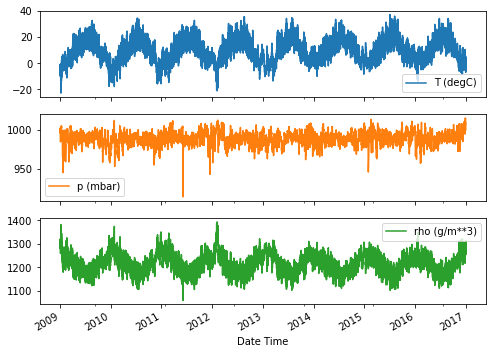

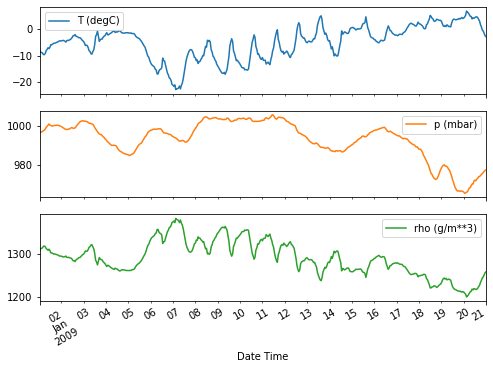

In [9]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [11]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame
df['wv (m/s)'].min()

0.0

Text(0, 0.5, 'Wind Velocity [m/s]')

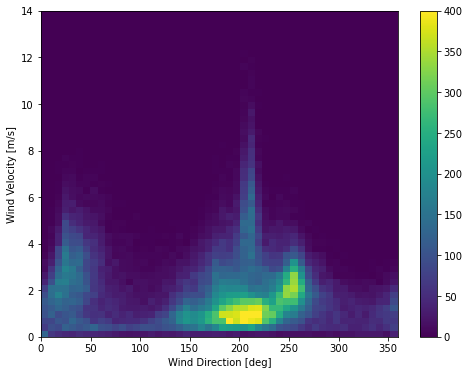

In [12]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [13]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

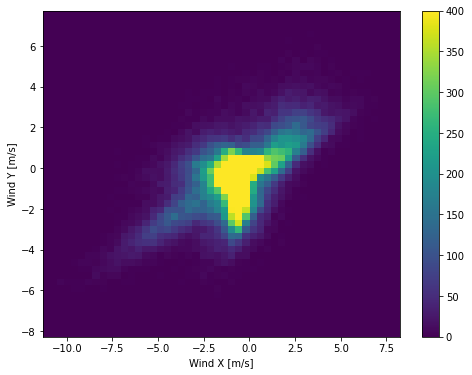

In [14]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [15]:
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [16]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

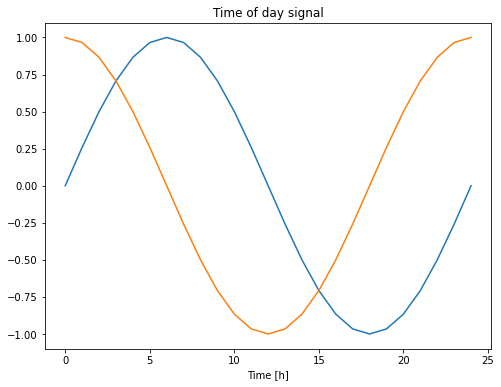

In [17]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

Qu'est ce qui est montré sur ce schéma?

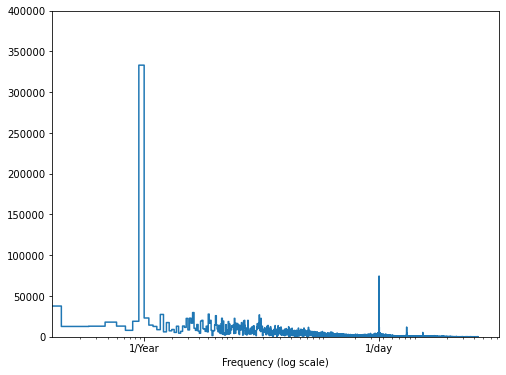

In [18]:
fft = tf.signal.rfft(df['T (degC)']) ### utilisation de tensorflow
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [20]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [21]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

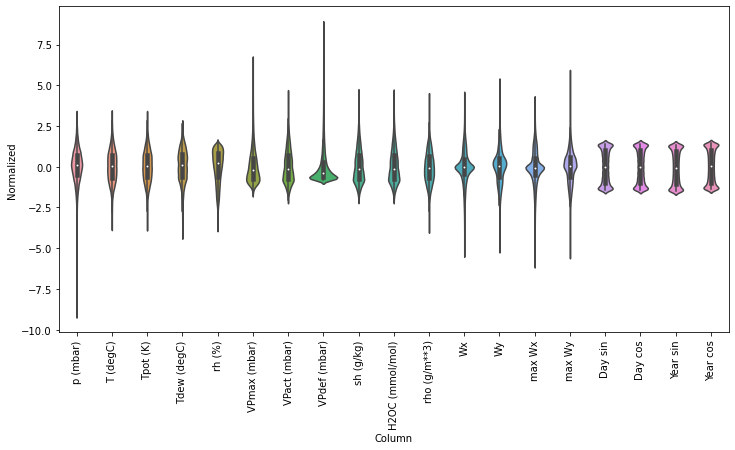

In [22]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

# Data windowing 

In [43]:
class WindowGenerator():
    def __init__(self,
                 input_width,
                 label_width,
                 shift,
                 train_df = train_df,
                 val_df = val_df, 
                 test_df = test_df,
                 label_columns = None,
                 dataframe = None):
        if dataframe is not None: 
            self.y = dataframe[label_columns]
            self.x = dataframe
        
        # Store the raw data
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        # Work out the label column indices
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = { name: i for i, name in enumerate(label_columns)}
        self.column_indices = { name: i for i, name in enumerate(train_df.columns)}
        
        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        self.label_start = self.total_window_size - self.label_width
        self.label_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.label_slice]
        
    def __len__(self):
        return len(self.y) // self.total_window_size
    
    def __getitem__(self, idx):
        return (
            self.x.iloc[self.input_indices + self.total_window_size*idx].values, 
            self.y.iloc[self.label_indices + self.total_window_size*idx].values,
        )
        
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'
        ])

In [53]:
w1 = WindowGenerator(input_width = 24, label_width = 1, shift = 24, label_columns=['T (degC)'])

In [54]:
print(w1)

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']


In [55]:
w2 = WindowGenerator(input_width = 6, label_width = 1, shift = 1, label_columns=['T (degC)'])

In [56]:
print(w2)

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']


In [82]:
def split_window(self, features):
    #print(self.input_slice)
    #print(self.label_slice)
    #print(features[:, self.input_slice, :])
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.label_slice, :]
    if self.label_columns is not None:
        #labels = tf.stack(
        #[labels[:, :, self.column_indices[name]] for name in self.label_columns],
        #axis=-1) ## utilisation de tensorflow
        labels = torch.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1
        )

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the tf.data.Datasets are easier to inspect.

    #inputs.set_shape([None, self.input_width, None])
    #labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [84]:
# Stack three slices, the length of the total window:
#example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
#                           np.array(train_df[100:100+w2.total_window_size]),
#                           np.array(train_df[200:200+w2.total_window_size])]) # utilisation de tensorflow
example_window = torch.stack([torch.tensor(train_df[:w2.total_window_size].values),
                                torch.tensor(train_df[100:100+w2.total_window_size].values),
                                torch.tensor(train_df[200:200+w2.total_window_size].values)])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, feature)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, feature)
Window shape: torch.Size([3, 7, 19])
Inputs shape: torch.Size([3, 6, 19])
labels shape: torch.Size([3, 1, 1])


In [85]:
w2.example = example_inputs, example_labels

In [177]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12,8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(3, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)
        
        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index
            
        if label_col_index is None:
            continue
            
        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                        marker = 'X', edgecolors = 'k', label = 'Predictions', 
                        c = '#ff7f0e', s=64)
            
        if n == 0:
            plt.legend()
    plt.xlabel('Time [h]')
    
WindowGenerator.plot = plot

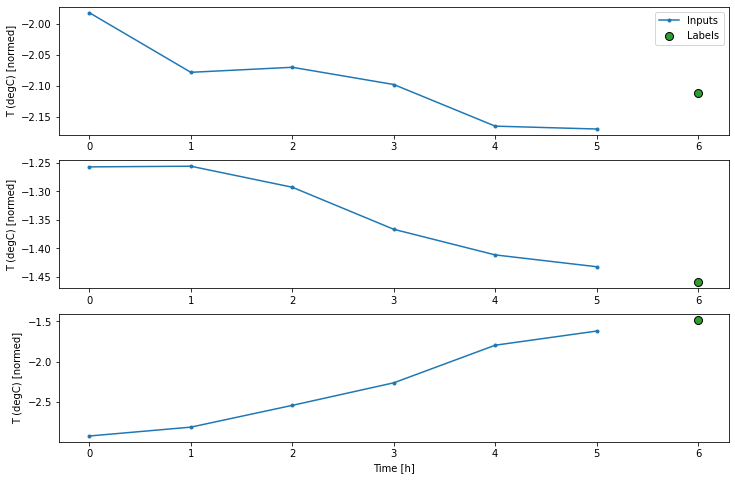

In [88]:
w2.plot()

In [89]:
single_step_window = WindowGenerator(
    input_width = 1,
    label_width = 1,
    shift = 1,
    label_columns = ['T (degC)'])

In [90]:
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

In [91]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

In [122]:
BATCH_SIZE = 4

train_ds = WindowGenerator(
    dataframe=train_df, label_columns=['T (degC)'],
    input_width=1, label_width=1, shift=1
)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=False)

val_ds = WindowGenerator(
    dataframe=val_df, label_columns=['T (degC)'],
    input_width=1, label_width=1, shift=1
)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False)

In [125]:
print(len(train_ds.y) // train_ds.total_window_size)
print(len(train_ds.y))
print(train_ds.total_window_size)
print(len(train_ds))
#print(train_df)

24531
49063
2
24531


In [102]:
for (inputs, label) in train_loader:
    print(inputs.shape, label.shape)
    print(inputs)
    print(label)
    break
#print(len(train_ds))

torch.Size([4, 1, 19]) torch.Size([4, 1, 1])
tensor([[[ 9.4531e-01, -1.9825e+00, -2.0419e+00, -1.9190e+00,  1.1171e+00,
          -1.3029e+00, -1.4773e+00, -7.9042e-01, -1.4800e+00, -1.4827e+00,
           2.2185e+00,  1.9341e-01,  2.2116e-01,  1.1114e-01,  2.1793e-01,
           4.7198e-05,  1.4142e+00, -6.2412e-02,  1.4285e+00]],

        [[ 9.8628e-01, -2.0703e+00, -2.1324e+00, -2.0452e+00,  1.0627e+00,
          -1.3288e+00, -1.5272e+00, -7.8835e-01, -1.5287e+00, -1.5320e+00,
           2.3240e+00,  2.0798e-01,  2.7627e-01,  1.1122e-01,  3.2408e-01,
           7.0718e-01,  1.2248e+00, -6.0366e-02,  1.4284e+00]],

        [[ 1.0610e+00, -2.1650e+00, -2.2322e+00, -2.1872e+00,  9.8421e-01,
          -1.3535e+00, -1.5795e+00, -7.8212e-01, -1.5811e+00, -1.5860e+00,
           2.4463e+00,  1.1226e-01,  3.5082e-01,  4.8640e-02,  4.0205e-01,
           1.2248e+00,  7.0718e-01, -5.8320e-02,  1.4284e+00]],

        [[ 1.1659e+00, -2.1119e+00, -2.1863e+00, -2.1083e+00,  1.0265e+00,
          

In [127]:
loss = nn.MSELoss()

In [129]:
class Baseline(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        return x[:, -1, 1].reshape((x.shape[0], -1, 1))

In [ ]:
for (inputs, label) in train_loader:
    out = baseline(inputs)
    print(out)
    break

In [ ]:
running_loss = 0
pbar = tqdm(val_loader)
with torch.no_grad():
    for i, (inputs, label) in enumerate (pbar):
        out = baseline(inputs)
        running_loss += loss(out, label) 
        if not (i % 100):
            #print(f"Loss total: {running_loss}")
            pbar.set_description(f"Loss: {running_loss / (i+1):.5f}")
        

In [ ]:
targets = []
outputs = []

for i in range(24):
    targets.append(float(val_ds[i][1]))
    outputs.append(baseline(val_ds[i][0][None, :]).squeeze())
    
plt.figure(figsize=(12, 5))
plt.plot(targets, "xr-", label="Targets")
plt.plot(outputs, "ok", label="Prediction")
plt.legend()
plt.show()

In [ ]:
print(val_ds[i][0])

In [ ]:
print(val_ds[i][0][None, :])

# Linear model

In [131]:
class Linear(nn.Module):
    def __init__(self):
        super(Linear, self).__init__()
        self.dense = nn.Linear(19, 1)
        
    def forward(self, x):
        return self.dense(x)

In [132]:
linear = Linear()

In [133]:
for (inputs, label) in train_loader:
    out = linear(inputs.float())
    print(out)
    break;

tensor([[[-0.4381]],

        [[-0.5625]],

        [[-0.6778]],

        [[-0.4847]]], grad_fn=<AddBackward0>)


Epoch #20 - Loss = 0.00883): 100%|██████████| 6133/6133 [00:09<00:00, 630.12it/s]


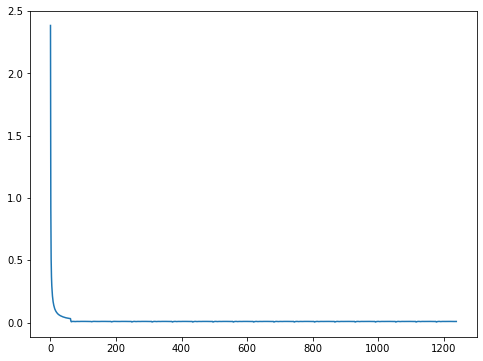

In [134]:
MAX_EPOCHS = 20

criterion = nn.MSELoss()
optimizer = optim.Adam(linear.parameters())

history = []

for epoch in range(MAX_EPOCHS):
    running_loss = 0
    pbar = tqdm(train_loader)
    for i, (inputs, label) in enumerate(pbar):
        optimizer.zero_grad()
        outputs = linear(inputs.float())
        loss = criterion(outputs, label.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if not(i % 100):
            pbar.set_description(
            f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f})"
            )
            history.append(running_loss / (i+1))
        
plt.plot(history)
plt.show()

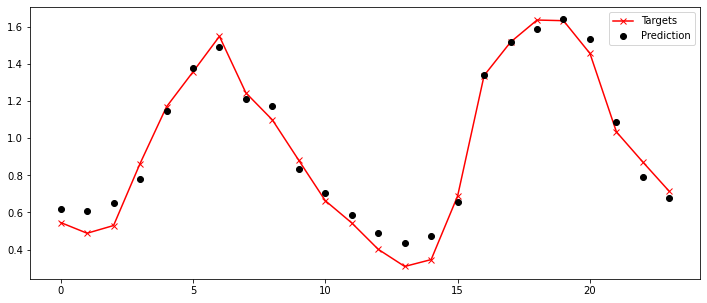

In [140]:
targets = []
outputs = []
for i in range(24):
    outputs.append(linear(torch.Tensor(val_ds[i][0])))
    targets.append(val_ds[i][1].squeeze())

plt.figure(figsize=(12, 5))
plt.plot(targets, "xr-", label="Targets")
plt.plot(outputs, "ok", label="Prediction")
plt.legend()
plt.show()

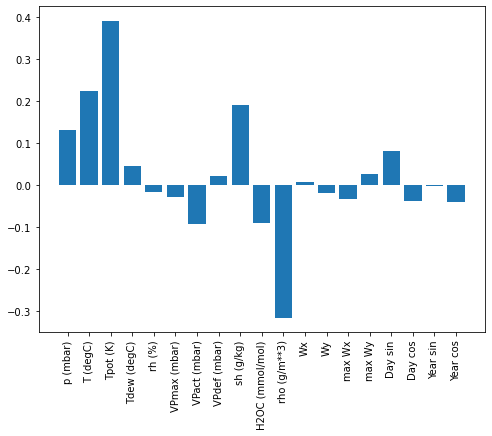

In [157]:
plt.bar(x = range(len(train_df.columns)),
       height = list(linear.parameters())[0].data.squeeze().numpy()
       )
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation = 90)

# Dense 

In [240]:
class Dense(nn.Module):
    def __init__(self):
        super(Dense, self).__init__()
        self.dense_1 = nn.Linear(19,64)
        self.dense_2 = nn.Linear(64,64)
        self.dense_3 = nn.Linear(64,1)
        
    def forward(self, x):
        x = self.dense_1(x)
        x = F.relu(x)
        x = self.dense_2(x)
        x = F.relu(x)
        x = self.dense_3(x)
        return x

In [241]:
dense = Dense()

In [242]:
for (inputs, label) in train_loader:
    out = dense(inputs.float())
    print(out)
    break;

tensor([[[-0.2105],
         [-0.2090],
         [-0.2006]],

        [[-0.1878],
         [-0.1842],
         [-0.2095]],

        [[-0.1755],
         [-0.1839],
         [-0.1724]],

        [[-0.1976],
         [-0.2034],
         [-0.2094]]], grad_fn=<AddBackward0>)


Epoch #10 - Loss = 0.00720): 100%|██████████| 6133/6133 [00:10<00:00, 583.18it/s]


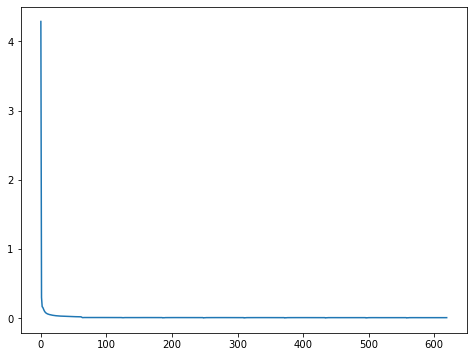

In [165]:
MAX_EPOCHS = 10

criterion = nn.MSELoss()
# optimizer = optim.Adam(linear.parameters()) ## Pourquoi ne marche pas avec cet optimiseur?
optimizer = optim.SGD(dense.parameters(), lr=1e-3, momentum=0.9)

history = []

for epoch in range(MAX_EPOCHS):
    running_loss = 0
    pbar = tqdm(train_loader)
    for i, (inputs, label) in enumerate(pbar):
        optimizer.zero_grad()
        outputs = dense(inputs.float())
        loss = criterion(outputs, label.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if not(i % 100):
            pbar.set_description(
            f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f})"
            )
            history.append(running_loss / (i+1))
        
plt.plot(history)
plt.show()

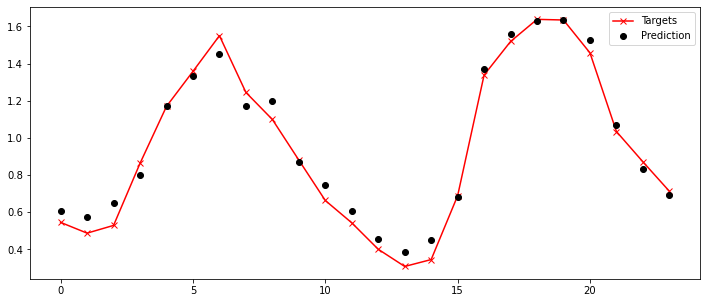

In [166]:
targets = []
outputs = []
for i in range(24):
    outputs.append(dense(torch.Tensor(val_ds[i][0])))
    targets.append(val_ds[i][1].squeeze())

plt.figure(figsize=(12, 5))
plt.plot(targets, "xr-", label="Targets")
plt.plot(outputs, "ok", label="Prediction")
plt.legend()
plt.show()

# Multi-step dense

In [188]:
BATCH_SIZE = 4
CONV_WIDTH = 3

train_ds = WindowGenerator(
    dataframe = train_df,
    input_width = CONV_WIDTH,
    label_width = 1,
    shift = 1,
    label_columns = ['T (degC)']
)

train_loader = DataLoader(train_ds, batch_size = BATCH_SIZE, shuffle = False)

val_ds = WindowGenerator(
    dataframe = val_df, 
    input_width = CONV_WIDTH,
    label_width = 1,
    shift = 1,
    label_columns = ['T (degC)']
)

val_loader = DataLoader(val_ds, batch_size = BATCH_SIZE, shuffle = False )

In [189]:
for (inputs, label) in train_loader:
    print(inputs.shape, label.shape)
    break

torch.Size([4, 3, 19]) torch.Size([4, 1, 1])


In [202]:
print(inputs.float())
print(torch.flatten(inputs, start_dim = 1))

tensor([[[ 9.4531e-01, -1.9825e+00, -2.0419e+00, -1.9190e+00,  1.1171e+00,
          -1.3029e+00, -1.4773e+00, -7.9042e-01, -1.4800e+00, -1.4827e+00,
           2.2185e+00,  1.9341e-01,  2.2116e-01,  1.1114e-01,  2.1793e-01,
           4.7198e-05,  1.4142e+00, -6.2412e-02,  1.4285e+00],
         [ 9.5977e-01, -2.0784e+00, -2.1382e+00, -2.0610e+00,  1.0446e+00,
          -1.3301e+00, -1.5344e+00, -7.8627e-01, -1.5362e+00, -1.5390e+00,
           2.3257e+00,  1.7299e-01,  2.2210e-01,  1.0946e-01,  2.2780e-01,
           3.6609e-01,  1.3661e+00, -6.1389e-02,  1.4284e+00],
         [ 9.8628e-01, -2.0703e+00, -2.1324e+00, -2.0452e+00,  1.0627e+00,
          -1.3288e+00, -1.5272e+00, -7.8835e-01, -1.5287e+00, -1.5320e+00,
           2.3240e+00,  2.0798e-01,  2.7627e-01,  1.1122e-01,  3.2408e-01,
           7.0718e-01,  1.2248e+00, -6.0366e-02,  1.4284e+00]],

        [[ 1.0610e+00, -2.1650e+00, -2.2322e+00, -2.1872e+00,  9.8421e-01,
          -1.3535e+00, -1.5795e+00, -7.8212e-01, -1.5811e+0

In [273]:
class MultiStepDense(nn.Module):
    def __init__(self):
        super(MultiStepDense,self).__init__()
        self.flatten = nn.Flatten()
        self.dense_1 = nn.Linear(19*CONV_WIDTH,32)
        self.dense_2 = nn.Linear(32,32)
        self.dense_3 = nn.Linear(32,1)
        #self.reshape = torch.reshape([1, -1])
        #self.reshape = nn.Unflatten()
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = F.relu(x)
        x = self.dense_2(x)
        x = F.relu(x)
        x = self.dense_3(x)
        x = torch.reshape(x, [1,-1])
        return x

In [274]:
multistep = MultiStepDense()

In [275]:
for (inputs, label) in train_loader:
    out = multistep(inputs.float())
    print(out)
    print(label)
    break

tensor([[ 0.0142, -0.0289, -0.0156,  0.0518]], grad_fn=<ViewBackward>)
tensor([[[-2.0980]],

        [[-1.9883]],

        [[-1.8461]],

        [[-1.6763]]], dtype=torch.float64)


In [254]:
N_EPOCHS = 5

criterion = nn.MSELoss()
optimizer = optim.SGD(multistep.parameters(), lr=1e-3, momentum=0.9)

history = []
for epoch in range(N_EPOCHS):
    running_loss = 0
    pbar = tqdm(train_loader)
    for i, (inputs, label) in enumerate(pbar):
        optimizer.zero_grad()
        outputs = multistep(inputs.float())
        print(outputs)
        print(label)
        loss = criterion(outputs, label.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if not (i % 100):
            pbar.set_description(
                f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f}"
            )
            history.append(running_loss / (i+1))

plt.plot(history)
plt.show()

  0%|          | 0/3067 [00:00<?, ?it/s]/usr/local/anaconda3/envs/batteryprobeai/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([4, 1, 1])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch #1 - Loss = 4.70757:   1%|          | 32/3067 [00:00<00:09, 310.60it/s]

tensor([[0.2150],
        [0.2783],
        [0.2710],
        [0.2820]], grad_fn=<AddmmBackward>)
tensor([[[-2.0980]],

        [[-1.9883]],

        [[-1.8461]],

        [[-1.6763]]], dtype=torch.float64)
tensor([[0.1924],
        [0.1802],
        [0.1693],
        [0.1928]], grad_fn=<AddmmBackward>)
tensor([[[-1.6185]],

        [[-1.5769]],

        [[-1.5815]],

        [[-1.5527]]], dtype=torch.float64)
tensor([[0.1987],
        [0.2033],
        [0.1149],
        [0.1691]], grad_fn=<AddmmBackward>)
tensor([[[-1.4129]],

        [[-1.3713]],

        [[-1.4337]],

        [[-1.5966]]], dtype=torch.float64)
tensor([[0.1130],
        [0.1333],
        [0.1901],
        [0.2340]], grad_fn=<AddmmBackward>)
tensor([[[-1.7699]],

        [[-2.1246]],

        [[-1.7410]],

        [[-1.3759]]], dtype=torch.float64)
tensor([[0.1424],
        [0.1349],
        [0.0680],
        [0.0615]], grad_fn=<AddmmBackward>)
tensor([[[-1.4960]],

        [[-1.2719]],

        [[-1.2696]],

        

Epoch #1 - Loss = 0.69537:   3%|▎         | 94/3067 [00:00<00:09, 308.03it/s]

tensor([[[-0.8929]],

        [[-0.8132]],

        [[-1.0327]],

        [[-1.0836]]], dtype=torch.float64)
tensor([[-1.2128],
        [-1.3030],
        [-1.2273],
        [-1.0983]], grad_fn=<AddmmBackward>)
tensor([[[-1.2187]],

        [[-1.4036]],

        [[-1.0639]],

        [[-1.0685]]], dtype=torch.float64)
tensor([[-1.1857],
        [-1.1564],
        [-1.2013],
        [-1.3359]], grad_fn=<AddmmBackward>)
tensor([[[-1.2973]],

        [[-1.2985]],

        [[-1.4429]],

        [[-1.5977]]], dtype=torch.float64)
tensor([[-1.2882],
        [-1.1242],
        [-1.0913],
        [-1.0764]], grad_fn=<AddmmBackward>)
tensor([[[-0.9726]],

        [[-0.9646]],

        [[-1.1148]],

        [[-1.1321]]], dtype=torch.float64)
tensor([[-1.1499],
        [-1.4040],
        [-1.5761],
        [-1.4500]], grad_fn=<AddmmBackward>)
tensor([[[-1.1991]],

        [[-1.7110]],

        [[-1.6035]],

        [[-1.3493]]], dtype=torch.float64)
tensor([[-1.3872],
        [-1.3546],
        [

Epoch #1 - Loss = 0.69537:   5%|▌         | 161/3067 [00:00<00:09, 317.71it/s]

tensor([[[-0.8328]],

        [[-0.7138]],

        [[-0.2517]],

        [[-0.1870]]], dtype=torch.float64)
tensor([[-0.4507],
        [-0.4891],
        [-0.3965],
        [-0.3718]], grad_fn=<AddmmBackward>)
tensor([[[-0.4735]],

        [[-0.4654]],

        [[-0.3360]],

        [[-0.1269]]], dtype=torch.float64)
tensor([[-0.2971],
        [-0.3669],
        [-0.4353],
        [-0.5483]], grad_fn=<AddmmBackward>)
tensor([[[-0.5232]],

        [[-0.1350]],

        [[-0.6538]],

        [[-0.5994]]], dtype=torch.float64)
tensor([[-0.5159],
        [-0.6653],
        [-0.3566],
        [-0.3651]], grad_fn=<AddmmBackward>)
tensor([[[-0.6665]],

        [[-0.7104]],

        [[-0.1396]],

        [[-0.0668]]], dtype=torch.float64)
tensor([[-0.5121],
        [-0.4974],
        [-0.4798],
        [-0.5777]], grad_fn=<AddmmBackward>)
tensor([[[-0.5128]],

        [[-0.5544]],

        [[-0.6122]],

        [[-0.5763]]], dtype=torch.float64)
tensor([[-0.3149],
        [-0.4756],
        [

Epoch #1 - Loss = 0.49745:   7%|▋         | 219/3067 [00:00<00:09, 299.29it/s]

tensor([[0.1823],
        [0.3117],
        [0.5012],
        [0.6076]], grad_fn=<AddmmBackward>)
tensor([[[0.0857]],

        [[0.5271]],

        [[0.9372]],

        [[1.1152]]], dtype=torch.float64)
tensor([[0.5132],
        [0.1864],
        [0.1658],
        [0.2427]], grad_fn=<AddmmBackward>)
tensor([[[ 0.8136]],

        [[ 0.1631]],

        [[-0.2759]],

        [[ 0.1389]]], dtype=torch.float64)
tensor([[0.4552],
        [0.6649],
        [0.4415],
        [0.2024]], grad_fn=<AddmmBackward>)
tensor([[[0.8922]],

        [[1.2284]],

        [[0.5814]],

        [[0.3075]]], dtype=torch.float64)
tensor([[0.0503],
        [0.0637],
        [0.4871],
        [0.7402]], grad_fn=<AddmmBackward>)
tensor([[[-0.4088]],

        [[ 0.0672]],

        [[ 0.8425]],

        [[ 1.0770]]], dtype=torch.float64)
tensor([[0.5508],
        [0.2899],
        [0.3469],
        [0.2694]], grad_fn=<AddmmBackward>)
tensor([[[0.8598]],

        [[0.5352]],

        [[0.3884]],

        [[0.3249]]]

Epoch #1 - Loss = 0.39015:   9%|▉         | 279/3067 [00:00<00:09, 290.44it/s]

tensor([[0.8084],
        [0.6272],
        [0.5666],
        [0.6677]], grad_fn=<AddmmBackward>)
tensor([[[1.2665]],

        [[0.8032]],

        [[0.4924]],

        [[1.0066]]], dtype=torch.float64)
tensor([[1.0658],
        [0.9842],
        [0.6447],
        [0.3382]], grad_fn=<AddmmBackward>)
tensor([[[1.4468]],

        [[0.9003]],

        [[0.6184]],

        [[0.1805]]], dtype=torch.float64)
tensor([[0.3999],
        [0.4515],
        [0.5696],
        [0.3909]], grad_fn=<AddmmBackward>)
tensor([[[0.2012]],

        [[0.3561]],

        [[0.5490]],

        [[0.8645]]], dtype=torch.float64)
tensor([[0.2995],
        [0.2525],
        [0.2243],
        [0.3378]], grad_fn=<AddmmBackward>)
tensor([[[ 0.3133]],

        [[ 0.0349]],

        [[-0.1327]],

        [[ 0.3156]]], dtype=torch.float64)
tensor([[0.5845],
        [0.7466],
        [0.7567],
        [0.3893]], grad_fn=<AddmmBackward>)
tensor([[[0.9037]],

        [[1.2457]],

        [[1.0008]],

        [[0.4370]]], dt

Epoch #1 - Loss = 0.39015:  11%|█         | 342/3067 [00:01<00:09, 302.72it/s]

tensor([[1.5834],
        [1.2226],
        [1.3163],
        [1.5016]], grad_fn=<AddmmBackward>)
tensor([[[1.7391]],

        [[1.1348]],

        [[1.1614]],

        [[1.6709]]], dtype=torch.float64)
tensor([[1.5185],
        [1.6079],
        [1.3423],
        [1.0404]], grad_fn=<AddmmBackward>)
tensor([[[1.3151]],

        [[1.1314]],

        [[1.2977]],

        [[0.6935]]], dtype=torch.float64)
tensor([[0.8901],
        [0.9875],
        [1.0656],
        [1.0247]], grad_fn=<AddmmBackward>)
tensor([[[0.6010]],

        [[0.9315]],

        [[1.0840]],

        [[1.3139]]], dtype=torch.float64)
tensor([[0.5776],
        [0.5368],
        [0.6264],
        [0.7365]], grad_fn=<AddmmBackward>)
tensor([[[0.8021]],

        [[0.6022]],

        [[0.4358]],

        [[0.6403]]], dtype=torch.float64)
tensor([[0.6081],
        [0.6147],
        [0.4909],
        [0.5275]], grad_fn=<AddmmBackward>)
tensor([[[0.9430]],

        [[0.8852]],

        [[0.6969]],

        [[0.5051]]], dtype=

Epoch #1 - Loss = 0.34806:  13%|█▎        | 402/3067 [00:01<00:09, 293.28it/s]

tensor([[0.9421],
        [0.8207],
        [0.9394],
        [0.8744]], grad_fn=<AddmmBackward>)
tensor([[[1.1591]],

        [[0.7824]],

        [[0.6345]],

        [[0.8252]]], dtype=torch.float64)
tensor([[1.2025],
        [1.0592],
        [0.7062],
        [0.6007]], grad_fn=<AddmmBackward>)
tensor([[[0.7974]],

        [[1.1244]],

        [[0.7986]],

        [[0.5825]]], dtype=torch.float64)
tensor([[0.6228],
        [0.6632],
        [0.8145],
        [0.7447]], grad_fn=<AddmmBackward>)
tensor([[[0.4936]],

        [[0.6368]],

        [[0.9627]],

        [[0.6507]]], dtype=torch.float64)
tensor([[0.3787],
        [0.3609],
        [0.4931],
        [0.6204]], grad_fn=<AddmmBackward>)
tensor([[[0.2613]],

        [[0.1654]],

        [[0.1562]],

        [[0.3226]]], dtype=torch.float64)
tensor([[0.5121],
        [0.5416],
        [0.4639],
        [0.4409]], grad_fn=<AddmmBackward>)
tensor([[[0.5987]],

        [[0.7258]],

        [[0.2798]],

        [[0.1828]]], dtype=

Epoch #1 - Loss = 0.34806:  15%|█▌        | 468/3067 [00:01<00:08, 309.16it/s]

tensor([[-0.0062],
        [ 0.0456],
        [ 0.0517],
        [ 0.0074]], grad_fn=<AddmmBackward>)
tensor([[[-0.4712]],

        [[-0.4446]],

        [[-0.5590]],

        [[-0.4689]]], dtype=torch.float64)
tensor([[-0.0901],
        [-0.1285],
        [-0.0733],
        [-0.1594]], grad_fn=<AddmmBackward>)
tensor([[[-0.2297]],

        [[-0.5994]],

        [[-0.8016]],

        [[-0.8698]]], dtype=torch.float64)
tensor([[-0.1626],
        [-0.0985],
        [-0.1906],
        [-0.0588]], grad_fn=<AddmmBackward>)
tensor([[[-0.9160]],

        [[-0.8987]],

        [[-0.5948]],

        [[-0.5590]]], dtype=torch.float64)
tensor([[-0.1425],
        [-0.1316],
        [-0.0989],
        [-0.1234]], grad_fn=<AddmmBackward>)
tensor([[[-0.7705]],

        [[-0.9796]],

        [[-0.9461]],

        [[-0.9634]]], dtype=torch.float64)
tensor([[-0.1954],
        [-0.2317],
        [-0.1905],
        [-0.1043]], grad_fn=<AddmmBackward>)
tensor([[[-0.8144]],

        [[-0.9334]],

        [[

Epoch #1 - Loss = 0.30495:  17%|█▋        | 530/3067 [00:01<00:08, 289.05it/s]

tensor([[-0.1067],
        [-0.1952],
        [-0.0278],
        [ 0.0790]], grad_fn=<AddmmBackward>)
tensor([[[ 0.1377]],

        [[-0.1454]],

        [[ 0.3087]],

        [[ 0.2787]]], dtype=torch.float64)
tensor([[0.1338],
        [0.0340],
        [0.0249],
        [0.0233]], grad_fn=<AddmmBackward>)
tensor([[[0.1989]],

        [[0.1550]],

        [[0.4635]],

        [[0.2371]]], dtype=torch.float64)
tensor([[-0.1212],
        [-0.1342],
        [-0.0424],
        [-0.2561]], grad_fn=<AddmmBackward>)
tensor([[[ 0.0210]],

        [[ 0.0141]],

        [[-0.0992]],

        [[-0.2702]]], dtype=torch.float64)
tensor([[-0.1064],
        [-0.0139],
        [-0.1297],
        [-0.1978]], grad_fn=<AddmmBackward>)
tensor([[[-0.0287]],

        [[-0.1049]],

        [[-0.1558]],

        [[-0.2471]]], dtype=torch.float64)
tensor([[-0.1996],
        [-0.3033],
        [ 0.0836],
        [-0.0971]], grad_fn=<AddmmBackward>)
tensor([[[-0.2205]],

        [[-0.3487]],

        [[ 0.0406]

Epoch #1 - Loss = 0.27186:  19%|█▉        | 590/3067 [00:02<00:08, 288.75it/s]

tensor([[-1.2283],
        [-1.2273],
        [-1.0910],
        [-1.1785]], grad_fn=<AddmmBackward>)
tensor([[[-1.1876]],

        [[-1.1413]],

        [[-1.0801]],

        [[-1.0628]]], dtype=torch.float64)
tensor([[-0.7555],
        [-0.6679],
        [-1.0677],
        [-1.2584]], grad_fn=<AddmmBackward>)
tensor([[[-0.5093]],

        [[-0.8698]],

        [[-1.0154]],

        [[-1.1286]]], dtype=torch.float64)
tensor([[-1.1417],
        [-1.2888],
        [-1.4298],
        [-1.4638]], grad_fn=<AddmmBackward>)
tensor([[[-1.1552]],

        [[-1.1806]],

        [[-1.2014]],

        [[-1.2060]]], dtype=torch.float64)
tensor([[-1.2848],
        [-1.3891],
        [-1.3737],
        [-1.5049]], grad_fn=<AddmmBackward>)
tensor([[[-1.2072]],

        [[-1.3817]],

        [[-1.4776]],

        [[-1.5111]]], dtype=torch.float64)
tensor([[-1.6085],
        [-1.5324],
        [-1.5077],
        [-1.3003]], grad_fn=<AddmmBackward>)
tensor([[[-1.5111]],

        [[-1.5111]],

        [[

Epoch #1 - Loss = 0.27186:  21%|██▏       | 656/3067 [00:02<00:07, 305.93it/s]

tensor([[-2.0621],
        [-1.9839],
        [-1.8444],
        [-1.8708]], grad_fn=<AddmmBackward>)
tensor([[[-1.8346]],

        [[-1.7445]],

        [[-1.7884]],

        [[-1.8380]]], dtype=torch.float64)
tensor([[-1.9774],
        [-2.0542],
        [-2.0480],
        [-2.0257]], grad_fn=<AddmmBackward>)
tensor([[[-1.8415]],

        [[-1.8669]],

        [[-2.1015]],

        [[-1.9617]]], dtype=torch.float64)
tensor([[-1.8000],
        [-1.7954],
        [-1.8159],
        [-1.7361]], grad_fn=<AddmmBackward>)
tensor([[[-1.8935]],

        [[-2.0079]],

        [[-1.7017]],

        [[-1.7086]]], dtype=torch.float64)
tensor([[-1.8312],
        [-1.6927],
        [-1.7146],
        [-1.7265]], grad_fn=<AddmmBackward>)
tensor([[[-1.8219]],

        [[-1.8392]],

        [[-1.8762]],

        [[-1.8843]]], dtype=torch.float64)
tensor([[-1.6472],
        [-1.7478],
        [-1.7973],
        [-1.8055]], grad_fn=<AddmmBackward>)
tensor([[[-1.7537]],

        [[-1.7375]],

        [[

Epoch #1 - Loss = 0.25180:  23%|██▎       | 718/3067 [00:02<00:07, 304.99it/s]

tensor([[-0.1000],
        [-0.3749],
        [ 0.1208],
        [ 0.0884]], grad_fn=<AddmmBackward>)
tensor([[[-0.6283]],

        [[-0.5082]],

        [[ 0.4173]],

        [[ 0.3757]]], dtype=torch.float64)
tensor([[ 0.0065],
        [-0.3511],
        [-0.6322],
        [-0.7579]], grad_fn=<AddmmBackward>)
tensor([[[-0.1719]],

        [[-0.6792]],

        [[-1.0027]],

        [[-0.5821]]], dtype=torch.float64)
tensor([[0.1861],
        [0.4318],
        [0.3776],
        [0.2588]], grad_fn=<AddmmBackward>)
tensor([[[0.7235]],

        [[1.0297]],

        [[0.4739]],

        [[0.0545]]], dtype=torch.float64)
tensor([[ 0.1506],
        [-0.1667],
        [ 0.3469],
        [ 0.5718]], grad_fn=<AddmmBackward>)
tensor([[[-0.3048]],

        [[-0.1350]],

        [[ 1.0493]],

        [[ 1.2966]]], dtype=torch.float64)
tensor([[0.4585],
        [0.3643],
        [0.2876],
        [0.1239]], grad_fn=<AddmmBackward>)
tensor([[[ 0.6484]],

        [[ 0.2983]],

        [[ 0.0302]],



Epoch #1 - Loss = 0.25180:  26%|██▌       | 785/3067 [00:02<00:07, 309.01it/s]

tensor([[[ 0.5629]],

        [[ 0.3618]],

        [[-0.0841]],

        [[-0.1581]]], dtype=torch.float64)
tensor([[ 0.2692],
        [ 0.3260],
        [ 0.1008],
        [-0.1355]], grad_fn=<AddmmBackward>)
tensor([[[-0.1315]],

        [[-0.1176]],

        [[-0.1442]],

        [[-0.1685]]], dtype=torch.float64)
tensor([[-0.1566],
        [-0.2583],
        [-0.5245],
        [-0.5412]], grad_fn=<AddmmBackward>)
tensor([[[-0.1904]],

        [[-0.4781]],

        [[-0.8259]],

        [[-0.5694]]], dtype=torch.float64)
tensor([[-0.2283],
        [-0.0004],
        [-0.1045],
        [-0.1409]], grad_fn=<AddmmBackward>)
tensor([[[-0.1454]],

        [[ 0.1215]],

        [[-0.0079]],

        [[-0.3672]]], dtype=torch.float64)
tensor([[-0.2112],
        [-0.0242],
        [-0.0281],
        [-0.1497]], grad_fn=<AddmmBackward>)
tensor([[[-0.5243]],

        [[-0.4100]],

        [[-0.4007]],

        [[-0.4238]]], dtype=torch.float64)
tensor([[-0.2496],
        [-0.1743],
        [

Epoch #1 - Loss = 0.24195:  28%|██▊       | 847/3067 [00:02<00:07, 295.59it/s]

tensor([[0.5594],
        [0.3795],
        [0.4084],
        [0.4901]], grad_fn=<AddmmBackward>)
tensor([[[0.5432]],

        [[0.2706]],

        [[0.1770]],

        [[0.4323]]], dtype=torch.float64)
tensor([[0.5531],
        [0.5417],
        [0.6404],
        [0.6898]], grad_fn=<AddmmBackward>)
tensor([[[0.7015]],

        [[0.7917]],

        [[0.6819]],

        [[0.4312]]], dtype=torch.float64)
tensor([[0.6528],
        [0.6435],
        [0.6572],
        [0.6718]], grad_fn=<AddmmBackward>)
tensor([[[0.2532]],

        [[0.5386]],

        [[0.9673]],

        [[1.0713]]], dtype=torch.float64)
tensor([[0.5085],
        [0.3728],
        [0.3603],
        [0.2597]], grad_fn=<AddmmBackward>)
tensor([[[ 0.6449]],

        [[ 0.2729]],

        [[-0.0252]],

        [[ 0.3919]]], dtype=torch.float64)
tensor([[0.3710],
        [0.5824],
        [0.6359],
        [0.4767]], grad_fn=<AddmmBackward>)
tensor([[[0.7870]],

        [[1.1048]],

        [[0.9419]],

        [[0.5629]]], dt

Epoch #1 - Loss = 0.24092:  30%|██▉       | 912/3067 [00:03<00:06, 309.13it/s]

tensor([[1.7780],
        [1.8920],
        [1.8393],
        [1.3178]], grad_fn=<AddmmBackward>)
tensor([[[2.3942]],

        [[2.7166]],

        [[2.3711]],

        [[1.4179]]], dtype=torch.float64)
tensor([[1.3958],
        [1.5117],
        [1.7781],
        [1.7159]], grad_fn=<AddmmBackward>)
tensor([[[1.4052]],

        [[1.4560]],

        [[2.1446]],

        [[1.4398]]], dtype=torch.float64)
tensor([[1.2405],
        [1.3250],
        [1.5485],
        [1.5169]], grad_fn=<AddmmBackward>)
tensor([[[1.2122]],

        [[1.0794]],

        [[0.9615]],

        [[1.0990]]], dtype=torch.float64)
tensor([[1.3899],
        [1.0595],
        [0.8742],
        [0.9997]], grad_fn=<AddmmBackward>)
tensor([[[1.2423]],

        [[0.9939]],

        [[0.7743]],

        [[0.7350]]], dtype=torch.float64)
tensor([[1.1305],
        [1.1331],
        [0.8617],
        [0.6564]], grad_fn=<AddmmBackward>)
tensor([[[0.7015]],

        [[0.7766]],

        [[1.1764]],

        [[1.1175]]], dtype=

Epoch #1 - Loss = 0.24092:  32%|███▏      | 984/3067 [00:03<00:06, 330.55it/s]

tensor([[[0.4254]],

        [[0.3341]],

        [[0.1146]],

        [[0.3515]]], dtype=torch.float64)
tensor([[0.5642],
        [0.4127],
        [0.2060],
        [0.2598]], grad_fn=<AddmmBackward>)
tensor([[[0.6992]],

        [[0.8021]],

        [[0.4705]],

        [[0.1839]]], dtype=torch.float64)
tensor([[0.3374],
        [0.2784],
        [0.0649],
        [0.2780]], grad_fn=<AddmmBackward>)
tensor([[[0.0372]],

        [[0.1250]],

        [[0.3538]],

        [[0.7709]]], dtype=torch.float64)
tensor([[ 0.1447],
        [-0.2043],
        [-0.3726],
        [-0.3330]], grad_fn=<AddmmBackward>)
tensor([[[ 0.1435]],

        [[-0.3118]],

        [[-0.5267]],

        [[-0.3314]]], dtype=torch.float64)
tensor([[0.1622],
        [0.3818],
        [0.1560],
        [0.0955]], grad_fn=<AddmmBackward>)
tensor([[[ 0.6542]],

        [[ 0.6946]],

        [[ 0.3110]],

        [[-0.1361]]], dtype=torch.float64)
tensor([[-0.2470],
        [-0.3907],
        [ 0.2342],
        [ 0.38

Epoch #1 - Loss = 0.22833:  34%|███▍      | 1053/3067 [00:03<00:06, 330.77it/s]

tensor([[-0.6500],
        [-0.6448],
        [-0.5712],
        [-0.5678]], grad_fn=<AddmmBackward>)
tensor([[[-0.6780]],

        [[-0.7473]],

        [[-0.7092]],

        [[-0.6191]]], dtype=torch.float64)
tensor([[-0.2903],
        [-0.6243],
        [-0.6738],
        [-0.5484]], grad_fn=<AddmmBackward>)
tensor([[[-0.3326]],

        [[-0.2956]],

        [[-0.6064]],

        [[-0.7508]]], dtype=torch.float64)
tensor([[-0.6316],
        [-0.6820],
        [-0.2784],
        [-0.3376]], grad_fn=<AddmmBackward>)
tensor([[[-0.9103]],

        [[-0.7612]],

        [[-0.0864]],

        [[-0.3118]]], dtype=torch.float64)
tensor([[-0.6089],
        [-0.6632],
        [-0.7124],
        [-0.8268]], grad_fn=<AddmmBackward>)
tensor([[[-0.5544]],

        [[-0.8883]],

        [[-1.1668]],

        [[-1.0651]]], dtype=torch.float64)
tensor([[-0.4491],
        [-0.0375],
        [-0.1981],
        [-0.0588]], grad_fn=<AddmmBackward>)
tensor([[[-0.1015]],

        [[ 0.0256]],

        [[

Epoch #1 - Loss = 0.21354:  37%|███▋      | 1121/3067 [00:03<00:05, 330.60it/s]

tensor([[-2.4440],
        [-2.4274],
        [-2.4653],
        [-2.5418]], grad_fn=<AddmmBackward>)
tensor([[[-2.4088]],

        [[-2.6549]],

        [[-2.6723]],

        [[-2.6769]]], dtype=torch.float64)
tensor([[-2.3711],
        [-1.8910],
        [-2.0208],
        [-1.7742]], grad_fn=<AddmmBackward>)
tensor([[[-1.8588]],

        [[-1.8045]],

        [[-1.8508]],

        [[-1.6070]]], dtype=torch.float64)
tensor([[-1.4594],
        [-1.4289],
        [-1.5872],
        [-1.6421]], grad_fn=<AddmmBackward>)
tensor([[[-1.4614]],

        [[-1.4337]],

        [[-1.3331]],

        [[-1.2083]]], dtype=torch.float64)
tensor([[-1.4941],
        [-1.3533],
        [-1.3122],
        [-1.3868]], grad_fn=<AddmmBackward>)
tensor([[[-1.0789]],

        [[-1.1656]],

        [[-1.1506]],

        [[-1.2777]]], dtype=torch.float64)
tensor([[-1.6599],
        [-1.7016],
        [-1.6697],
        [-1.6226]], grad_fn=<AddmmBackward>)
tensor([[[-1.1841]],

        [[-1.1760]],

        [[

Epoch #1 - Loss = 0.21354:  38%|███▊      | 1155/3067 [00:03<00:05, 324.38it/s]

tensor([[-1.1639],
        [-0.3659],
        [-0.6458],
        [-0.7924]], grad_fn=<AddmmBackward>)
tensor([[[-0.8375]],

        [[-0.1500]],

        [[-0.7462]],

        [[-0.7092]]], dtype=torch.float64)
tensor([[-0.4460],
        [-0.3279],
        [-0.3330],
        [-0.1840]], grad_fn=<AddmmBackward>)
tensor([[[-0.3441]],

        [[-0.4550]],

        [[-0.1858]],

        [[-0.2124]]], dtype=torch.float64)
tensor([[-0.4308],
        [-0.5598],
        [-0.7668],
        [-0.8074]], grad_fn=<AddmmBackward>)
tensor([[[-0.5059]],

        [[-0.5960]],

        [[-0.9172]],

        [[-0.9426]]], dtype=torch.float64)
tensor([[-0.9174],
        [-0.9906],
        [-1.0271],
        [-0.9856]], grad_fn=<AddmmBackward>)
tensor([[[-0.8051]],

        [[-0.8248]],

        [[-1.0316]],

        [[-1.0246]]], dtype=torch.float64)
tensor([[-0.9146],
        [-0.9647],
        [-1.0522],
        [-1.2571]], grad_fn=<AddmmBackward>)
tensor([[[-1.0628]],

        [[-1.0789]],

        [[

Epoch #1 - Loss = 0.20435:  40%|███▉      | 1221/3067 [00:03<00:05, 323.69it/s]

tensor([[-1.0746],
        [-1.1936],
        [-1.2619],
        [-1.1464]], grad_fn=<AddmmBackward>)
tensor([[[-1.2881]],

        [[-1.3274]],

        [[-1.0905]],

        [[-0.7127]]], dtype=torch.float64)
tensor([[-1.0756],
        [-1.1738],
        [-1.3710],
        [-1.4903]], grad_fn=<AddmmBackward>)
tensor([[[-0.9079]],

        [[-1.1887]],

        [[-1.5157]],

        [[-1.5792]]], dtype=torch.float64)
tensor([[-1.3884],
        [-0.9818],
        [-1.1529],
        [-1.1683]], grad_fn=<AddmmBackward>)
tensor([[[-0.8698]],

        [[-0.4758]],

        [[-0.9045]],

        [[-1.2661]]], dtype=torch.float64)
tensor([[-1.3043],
        [-1.3950],
        [-1.3721],
        [-1.1567]], grad_fn=<AddmmBackward>)
tensor([[[-1.4568]],

        [[-1.5561]],

        [[-1.0720]],

        [[-0.7312]]], dtype=torch.float64)
tensor([[-1.0651],
        [-1.1832],
        [-1.2187],
        [-1.3807]], grad_fn=<AddmmBackward>)
tensor([[[-0.9646]],

        [[-1.3077]],

        [[

Epoch #1 - Loss = 0.20723:  42%|████▏     | 1295/3067 [00:04<00:05, 343.30it/s]

tensor([[-0.0111],
        [ 0.0387],
        [ 0.0574],
        [ 0.0921]], grad_fn=<AddmmBackward>)
tensor([[[ 0.1030]],

        [[-0.1985]],

        [[-0.3788]],

        [[-0.2598]]], dtype=torch.float64)
tensor([[ 0.2547],
        [ 0.2228],
        [ 0.0609],
        [-0.0466]], grad_fn=<AddmmBackward>)
tensor([[[ 0.4866]],

        [[ 0.5017]],

        [[ 0.3156]],

        [[-0.4585]]], dtype=torch.float64)
tensor([[-0.3707],
        [-0.4080],
        [ 0.3094],
        [ 0.3450]], grad_fn=<AddmmBackward>)
tensor([[[-0.9033]],

        [[-0.2494]],

        [[ 0.7339]],

        [[ 0.9372]]], dtype=torch.float64)
tensor([[ 0.2132],
        [ 0.2482],
        [-0.1153],
        [-0.2341]], grad_fn=<AddmmBackward>)
tensor([[[ 0.4508]],

        [[-0.1038]],

        [[-0.7034]],

        [[-0.0414]]], dtype=torch.float64)
tensor([[0.4875],
        [0.4706],
        [0.3869],
        [0.3322]], grad_fn=<AddmmBackward>)
tensor([[[ 1.0077]],

        [[ 1.1706]],

        [[ 0.7

Epoch #1 - Loss = 0.20723:  45%|████▍     | 1365/3067 [00:04<00:05, 339.85it/s]

tensor([[0.5282],
        [0.6359],
        [0.7667],
        [0.7052]], grad_fn=<AddmmBackward>)
tensor([[[0.9026]],

        [[1.2365]],

        [[0.9673]],

        [[0.6241]]], dtype=torch.float64)
tensor([[0.7295],
        [0.8062],
        [0.8078],
        [0.9857]], grad_fn=<AddmmBackward>)
tensor([[[0.2879]],

        [[0.7454]],

        [[1.2423]],

        [[1.5727]]], dtype=torch.float64)
tensor([[1.0968],
        [0.9771],
        [1.0397],
        [0.9929]], grad_fn=<AddmmBackward>)
tensor([[[1.3959]],

        [[0.7766]],

        [[0.6287]],

        [[1.1186]]], dtype=torch.float64)
tensor([[1.3300],
        [1.4279],
        [1.4277],
        [1.3623]], grad_fn=<AddmmBackward>)
tensor([[[1.7067]],

        [[1.9609]],

        [[1.7033]],

        [[1.3139]]], dtype=torch.float64)
tensor([[1.3092],
        [1.2900],
        [1.6720],
        [1.6534]], grad_fn=<AddmmBackward>)
tensor([[[0.7454]],

        [[1.5115]],

        [[2.0256]],

        [[2.2105]]], dtype=

Epoch #1 - Loss = 0.20616:  47%|████▋     | 1434/3067 [00:04<00:04, 327.05it/s]

tensor([[0.5523],
        [0.5086],
        [0.7345],
        [0.8401]], grad_fn=<AddmmBackward>)
tensor([[[0.4601]],

        [[0.3445]],

        [[0.3203]],

        [[0.6819]]], dtype=torch.float64)
tensor([[0.7373],
        [0.6565],
        [0.6495],
        [0.5802]], grad_fn=<AddmmBackward>)
tensor([[[1.0563]],

        [[0.9488]],

        [[0.6657]],

        [[0.2255]]], dtype=torch.float64)
tensor([[0.5447],
        [0.6722],
        [1.1107],
        [1.1608]], grad_fn=<AddmmBackward>)
tensor([[[0.0372]],

        [[0.6438]],

        [[1.4318]],

        [[1.5600]]], dtype=torch.float64)
tensor([[1.1799],
        [1.0046],
        [1.0646],
        [0.9289]], grad_fn=<AddmmBackward>)
tensor([[[1.2480]],

        [[1.0239]],

        [[0.7223]],

        [[0.8795]]], dtype=torch.float64)
tensor([[1.0308],
        [0.9972],
        [0.8673],
        [0.8387]], grad_fn=<AddmmBackward>)
tensor([[[1.2665]],

        [[1.3382]],

        [[1.1418]],

        [[0.7154]]], dtype=

Epoch #1 - Loss = 0.20404:  49%|████▉     | 1500/3067 [00:04<00:04, 322.27it/s]

tensor([[[0.2151]],

        [[0.6253]],

        [[0.8887]],

        [[1.0482]]], dtype=torch.float64)
tensor([[0.6620],
        [0.6150],
        [0.6380],
        [0.5537]], grad_fn=<AddmmBackward>)
tensor([[[0.7397]],

        [[0.4520]],

        [[0.2821]],

        [[0.6576]]], dtype=torch.float64)
tensor([[0.6856],
        [0.5674],
        [0.4278],
        [0.4246]], grad_fn=<AddmmBackward>)
tensor([[[0.9349]],

        [[1.0840]],

        [[0.5664]],

        [[0.3145]]], dtype=torch.float64)
tensor([[0.4380],
        [0.2855],
        [0.4436],
        [0.2545]], grad_fn=<AddmmBackward>)
tensor([[[-0.0056]],

        [[ 0.4485]],

        [[ 0.6218]],

        [[ 0.7166]]], dtype=torch.float64)
tensor([[ 0.2921],
        [ 0.3100],
        [-0.0505],
        [-0.0830]], grad_fn=<AddmmBackward>)
tensor([[[ 0.5305]],

        [[-0.0772]],

        [[-0.4192]],

        [[-0.0691]]], dtype=torch.float64)
tensor([[0.3699],
        [0.4956],
        [0.4567],
        [0.3179]]

Epoch #1 - Loss = 0.20404:  51%|█████     | 1566/3067 [00:04<00:04, 318.08it/s]

tensor([[-0.3555],
        [-0.3560],
        [-0.0339],
        [ 0.0103]], grad_fn=<AddmmBackward>)
tensor([[[-0.6849]],

        [[-0.4377]],

        [[-0.0125]],

        [[ 0.0996]]], dtype=torch.float64)
tensor([[-0.3898],
        [-0.1402],
        [ 0.0934],
        [ 0.2629]], grad_fn=<AddmmBackward>)
tensor([[[-0.1962]],

        [[-0.2782]],

        [[-0.2205]],

        [[-0.0876]]], dtype=torch.float64)
tensor([[0.3296],
        [0.4268],
        [0.5364],
        [0.6982]], grad_fn=<AddmmBackward>)
tensor([[[0.3457]],

        [[0.8679]],

        [[0.9257]],

        [[0.7397]]], dtype=torch.float64)
tensor([[0.8574],
        [0.8481],
        [0.5300],
        [0.3698]], grad_fn=<AddmmBackward>)
tensor([[[0.6738]],

        [[0.7212]],

        [[0.7362]],

        [[0.5213]]], dtype=torch.float64)
tensor([[0.3811],
        [0.5450],
        [0.1829],
        [0.2542]], grad_fn=<AddmmBackward>)
tensor([[[ 0.5201]],

        [[-0.0090]],

        [[-0.0992]],

        

Epoch #1 - Loss = 0.20152:  53%|█████▎    | 1635/3067 [00:05<00:04, 326.80it/s]

tensor([[-0.6792],
        [-0.3996],
        [-0.6901],
        [-0.8100]], grad_fn=<AddmmBackward>)
tensor([[[-0.2886]],

        [[-0.0102]],

        [[-0.6699]],

        [[-0.8178]]], dtype=torch.float64)
tensor([[-0.9263],
        [-1.1016],
        [-0.9658],
        [-0.5297]], grad_fn=<AddmmBackward>)
tensor([[[-1.2580]],

        [[-1.2187]],

        [[-0.3014]],

        [[-0.1870]]], dtype=torch.float64)
tensor([[-0.8359],
        [-0.9385],
        [-1.0665],
        [-1.1309]], grad_fn=<AddmmBackward>)
tensor([[[-0.7820]],

        [[-0.9634]],

        [[-1.1991]],

        [[-1.3019]]], dtype=torch.float64)
tensor([[-1.0669],
        [-0.5099],
        [-0.8860],
        [-1.0388]], grad_fn=<AddmmBackward>)
tensor([[[-0.3580]],

        [[-0.1026]],

        [[-0.7462]],

        [[-1.0154]]], dtype=torch.float64)
tensor([[-1.0759],
        [-1.0750],
        [-1.0701],
        [-0.7553]], grad_fn=<AddmmBackward>)
tensor([[[-1.1876]],

        [[-1.1806]],

        [[

Epoch #1 - Loss = 0.19242:  55%|█████▌    | 1701/3067 [00:05<00:04, 310.87it/s]

tensor([[-0.3890],
        [-0.2186],
        [-0.3846],
        [-0.5276]], grad_fn=<AddmmBackward>)
tensor([[[-0.0957]],

        [[-0.1777]],

        [[-0.3892]],

        [[-0.5047]]], dtype=torch.float64)
tensor([[-0.6852],
        [-0.6981],
        [-0.7692],
        [-0.5611]], grad_fn=<AddmmBackward>)
tensor([[[-0.4215]],

        [[-0.5521]],

        [[-0.5486]],

        [[-0.6942]]], dtype=torch.float64)
tensor([[-0.4810],
        [-0.5557],
        [-0.8219],
        [-0.8987]], grad_fn=<AddmmBackward>)
tensor([[[-0.5994]],

        [[-0.4666]],

        [[-0.8617]],

        [[-0.6052]]], dtype=torch.float64)
tensor([[-0.8539],
        [-0.8954],
        [-0.7921],
        [-0.8357]], grad_fn=<AddmmBackward>)
tensor([[[-0.7635]],

        [[-0.6861]],

        [[-0.9103]],

        [[-0.8317]]], dtype=torch.float64)
tensor([[-0.8205],
        [-0.8991],
        [-0.9394],
        [-0.7648]], grad_fn=<AddmmBackward>)
tensor([[[-0.6272]],

        [[-0.7577]],

        [[

Epoch #1 - Loss = 0.19242:  58%|█████▊    | 1766/3067 [00:05<00:04, 316.28it/s]

tensor([[-1.3091],
        [-1.2671],
        [-1.2752],
        [-1.3150]], grad_fn=<AddmmBackward>)
tensor([[[-1.2222]],

        [[-1.1829]],

        [[-1.2985]],

        [[-1.4313]]], dtype=torch.float64)
tensor([[-1.2161],
        [-1.2297],
        [-1.1980],
        [-0.9698]], grad_fn=<AddmmBackward>)
tensor([[[-1.4221]],

        [[-1.3909]],

        [[-1.0732]],

        [[-0.8271]]], dtype=torch.float64)
tensor([[-0.9620],
        [-0.9991],
        [-0.8625],
        [-0.8152]], grad_fn=<AddmmBackward>)
tensor([[[-0.9334]],

        [[-0.9634]],

        [[-0.7393]],

        [[-0.8560]]], dtype=torch.float64)
tensor([[-0.8790],
        [-0.9344],
        [-0.9655],
        [-0.9569]], grad_fn=<AddmmBackward>)
tensor([[[-0.6318]],

        [[-0.5787]],

        [[-0.8074]],

        [[-0.9877]]], dtype=torch.float64)
tensor([[-0.9454],
        [-1.0782],
        [-0.9948],
        [-0.8789]], grad_fn=<AddmmBackward>)
tensor([[[-1.0905]],

        [[-1.1714]],

        [[

Epoch #1 - Loss = 0.18953:  60%|█████▉    | 1831/3067 [00:05<00:03, 320.72it/s]

tensor([[-0.4785],
        [-0.5847],
        [ 0.2569],
        [ 0.4966]], grad_fn=<AddmmBackward>)
tensor([[[-0.8502]],

        [[-0.6838]],

        [[ 0.7801]],

        [[ 1.0447]]], dtype=torch.float64)
tensor([[ 0.4758],
        [ 0.2375],
        [ 0.0692],
        [-0.1107]], grad_fn=<AddmmBackward>)
tensor([[[ 0.4924]],

        [[-0.0102]],

        [[-0.4897]],

        [[ 0.1169]]], dtype=torch.float64)
tensor([[0.3208],
        [0.4912],
        [0.3413],
        [0.2875]], grad_fn=<AddmmBackward>)
tensor([[[0.8055]],

        [[1.1498]],

        [[0.5952]],

        [[0.3977]]], dtype=torch.float64)
tensor([[ 0.3553],
        [ 0.2239],
        [-0.1183],
        [-0.0784]], grad_fn=<AddmmBackward>)
tensor([[[ 0.0996]],

        [[-0.0934]],

        [[ 0.0545]],

        [[-0.0402]]], dtype=torch.float64)
tensor([[-0.1767],
        [-0.2076],
        [-0.1039],
        [ 0.0641]], grad_fn=<AddmmBackward>)
tensor([[[-0.3198]],

        [[-0.3880]],

        [[-0.3187]

Epoch #1 - Loss = 0.18985:  62%|██████▏   | 1898/3067 [00:06<00:03, 322.28it/s]

tensor([[1.0653],
        [1.0588],
        [1.5984],
        [1.5861]], grad_fn=<AddmmBackward>)
tensor([[[0.3965]],

        [[1.2018]],

        [[1.6420]],

        [[1.9390]]], dtype=torch.float64)
tensor([[1.6155],
        [1.6141],
        [1.6227],
        [1.5984]], grad_fn=<AddmmBackward>)
tensor([[[1.6732]],

        [[1.2746]],

        [[1.1984]],

        [[1.5346]]], dtype=torch.float64)
tensor([[1.8971],
        [1.9113],
        [1.3332],
        [0.8059]], grad_fn=<AddmmBackward>)
tensor([[[2.2348]],

        [[2.3064]],

        [[1.2203]],

        [[0.4208]]], dtype=torch.float64)
tensor([[0.7187],
        [0.5309],
        [0.2795],
        [0.2674]], grad_fn=<AddmmBackward>)
tensor([[[0.2983]],

        [[0.0938]],

        [[0.2463]],

        [[0.4439]]], dtype=torch.float64)
tensor([[0.2288],
        [0.1574],
        [0.0518],
        [0.0194]], grad_fn=<AddmmBackward>)
tensor([[[-0.1072]],

        [[-0.3626]],

        [[-0.7450]],

        [[-0.2759]]], dt

Epoch #1 - Loss = 0.18985:  64%|██████▍   | 1963/3067 [00:06<00:03, 319.41it/s]

tensor([[0.6389],
        [0.8579],
        [1.1063],
        [1.1094]], grad_fn=<AddmmBackward>)
tensor([[[0.7628]],

        [[0.7570]],

        [[0.6958]],

        [[1.1706]]], dtype=torch.float64)
tensor([[1.0715],
        [0.9299],
        [0.8574],
        [0.6332]], grad_fn=<AddmmBackward>)
tensor([[[1.3879]],

        [[1.4167]],

        [[0.9950]],

        [[0.3179]]], dtype=torch.float64)
tensor([[0.5808],
        [0.7596],
        [1.0443],
        [0.9758]], grad_fn=<AddmmBackward>)
tensor([[[0.0638]],

        [[1.0170]],

        [[1.4526]],

        [[1.4375]]], dtype=torch.float64)
tensor([[0.9637],
        [0.8150],
        [0.6787],
        [0.8107]], grad_fn=<AddmmBackward>)
tensor([[[1.0574]],

        [[0.4913]],

        [[0.1677]],

        [[1.0019]]], dtype=torch.float64)
tensor([[1.2263],
        [1.0563],
        [0.7658],
        [0.4985]], grad_fn=<AddmmBackward>)
tensor([[[1.6120]],

        [[1.4283]],

        [[0.6345]],

        [[0.3676]]], dtype=

Epoch #1 - Loss = 0.18920:  66%|██████▋   | 2032/3067 [00:06<00:03, 329.42it/s]

tensor([[1.2956],
        [1.3980],
        [1.2859],
        [1.2540]], grad_fn=<AddmmBackward>)
tensor([[[1.5935]],

        [[1.9159]],

        [[1.3855]],

        [[0.9430]]], dtype=torch.float64)
tensor([[1.1077],
        [1.0622],
        [1.4777],
        [1.5160]], grad_fn=<AddmmBackward>)
tensor([[[0.5606]],

        [[1.1799]],

        [[1.9598]],

        [[2.1435]]], dtype=torch.float64)
tensor([[1.4778],
        [1.2009],
        [1.1073],
        [1.0772]], grad_fn=<AddmmBackward>)
tensor([[[1.6490]],

        [[0.9719]],

        [[0.7212]],

        [[0.7350]]], dtype=torch.float64)
tensor([[1.1005],
        [1.5035],
        [1.4364],
        [1.3700]], grad_fn=<AddmmBackward>)
tensor([[[1.2619]],

        [[1.8096]],

        [[1.4445]],

        [[1.0389]]], dtype=torch.float64)
tensor([[1.4177],
        [1.5603],
        [1.4395],
        [1.2978]], grad_fn=<AddmmBackward>)
tensor([[[1.2816]],

        [[1.3104]],

        [[1.5820]],

        [[1.5196]]], dtype=

Epoch #1 - Loss = 0.18888:  69%|██████▊   | 2105/3067 [00:06<00:02, 341.93it/s]

tensor([[[0.9222]],

        [[0.4497]],

        [[0.1157]],

        [[0.5225]]], dtype=torch.float64)
tensor([[1.1600],
        [1.1137],
        [0.9235],
        [0.4805]], grad_fn=<AddmmBackward>)
tensor([[[1.6270]],

        [[1.5542]],

        [[0.9650]],

        [[0.3041]]], dtype=torch.float64)
tensor([[0.5406],
        [0.2785],
        [0.2978],
        [0.2482]], grad_fn=<AddmmBackward>)
tensor([[[0.1955]],

        [[0.3364]],

        [[0.6599]],

        [[0.5675]]], dtype=torch.float64)
tensor([[-0.0027],
        [-0.0287],
        [-0.1505],
        [-0.3543]], grad_fn=<AddmmBackward>)
tensor([[[ 0.0534]],

        [[-0.1142]],

        [[-0.5301]],

        [[-0.1777]]], dtype=torch.float64)
tensor([[0.3574],
        [0.1587],
        [0.0397],
        [0.0118]], grad_fn=<AddmmBackward>)
tensor([[[ 0.4936]],

        [[ 0.6484]],

        [[ 0.2174]],

        [[-0.2609]]], dtype=torch.float64)
tensor([[-0.2821],
        [-0.3746],
        [ 0.3983],
        [ 0.47

Epoch #1 - Loss = 0.18888:  71%|███████   | 2175/3067 [00:06<00:02, 333.64it/s]

tensor([[-0.2282],
        [-0.3089],
        [-0.5083],
        [-0.4451]], grad_fn=<AddmmBackward>)
tensor([[[ 0.0649]],

        [[-0.1130]],

        [[-0.4261]],

        [[-0.4215]]], dtype=torch.float64)
tensor([[-0.4547],
        [-0.5512],
        [-0.6143],
        [-0.6342]], grad_fn=<AddmmBackward>)
tensor([[[-0.6145]],

        [[-0.5787]],

        [[-0.4423]],

        [[-0.3522]]], dtype=torch.float64)
tensor([[-0.7117],
        [-0.3594],
        [-0.2919],
        [-0.2987]], grad_fn=<AddmmBackward>)
tensor([[[-0.5186]],

        [[-0.3869]],

        [[-0.3510]],

        [[-0.2101]]], dtype=torch.float64)
tensor([[-0.1843],
        [-0.1631],
        [-0.0562],
        [ 0.0305]], grad_fn=<AddmmBackward>)
tensor([[[ 0.1238]],

        [[ 0.1100]],

        [[-0.0345]],

        [[-0.0564]]], dtype=torch.float64)
tensor([[-0.1993],
        [-0.2392],
        [-0.2067],
        [-0.2524]], grad_fn=<AddmmBackward>)
tensor([[[-0.3834]],

        [[-0.2112]],

        [[

Epoch #1 - Loss = 0.18261:  72%|███████▏  | 2209/3067 [00:06<00:02, 325.26it/s]

tensor([[-0.9213],
        [-0.7942],
        [-0.9307],
        [-1.1260]], grad_fn=<AddmmBackward>)
tensor([[[-0.9241]],

        [[-0.8802]],

        [[-0.8721]],

        [[-0.8964]]], dtype=torch.float64)
tensor([[-1.0986],
        [-1.1364],
        [-1.1624],
        [-1.0527]], grad_fn=<AddmmBackward>)
tensor([[[-0.9530]],

        [[-1.0004]],

        [[-1.1286]],

        [[-1.1691]]], dtype=torch.float64)
tensor([[-1.2547],
        [-1.2909],
        [-1.2810],
        [-1.2668]], grad_fn=<AddmmBackward>)
tensor([[[-1.1610]],

        [[-1.1148]],

        [[-1.1483]],

        [[-1.1691]]], dtype=torch.float64)
tensor([[-1.1394],
        [-0.9117],
        [-0.9540],
        [-0.6888]], grad_fn=<AddmmBackward>)
tensor([[[-1.1922]],

        [[-1.0593]],

        [[-0.7970]],

        [[-0.5602]]], dtype=torch.float64)
tensor([[-0.7144],
        [-0.6149],
        [-0.5306],
        [-0.5218]], grad_fn=<AddmmBackward>)
tensor([[[-0.6018]],

        [[-0.6168]],

        [[

Epoch #1 - Loss = 0.17691:  74%|███████▍  | 2279/3067 [00:07<00:02, 330.57it/s]

tensor([[-0.9486],
        [-0.9662],
        [-0.8400],
        [-0.8649]], grad_fn=<AddmmBackward>)
tensor([[[-0.8340]],

        [[-0.7912]],

        [[-0.9680]],

        [[-0.8120]]], dtype=torch.float64)
tensor([[-0.7462],
        [-0.7017],
        [-0.5995],
        [-0.5525]], grad_fn=<AddmmBackward>)
tensor([[[-0.7566]],

        [[-0.9183]],

        [[-0.5636]],

        [[-0.2482]]], dtype=torch.float64)
tensor([[-0.5203],
        [-0.4878],
        [-0.4579],
        [-0.5387]], grad_fn=<AddmmBackward>)
tensor([[[-0.4169]],

        [[-0.5775]],

        [[-0.6156]],

        [[-0.6896]]], dtype=torch.float64)
tensor([[-0.5039],
        [-0.8841],
        [-0.9621],
        [-0.8978]], grad_fn=<AddmmBackward>)
tensor([[[-0.3476]],

        [[-0.8895]],

        [[-1.0581]],

        [[-1.0050]]], dtype=torch.float64)
tensor([[-0.8907],
        [-1.0468],
        [-0.9253],
        [-0.8391]], grad_fn=<AddmmBackward>)
tensor([[[-1.2315]],

        [[-1.3100]],

        [[

Epoch #1 - Loss = 0.17691:  76%|███████▋  | 2346/3067 [00:07<00:02, 317.61it/s]

tensor([[-0.8355],
        [-0.8390],
        [-0.8352],
        [-0.9488]], grad_fn=<AddmmBackward>)
tensor([[[-0.8733]],

        [[-0.9149]],

        [[-0.7751]],

        [[-0.9854]]], dtype=torch.float64)
tensor([[-1.2120],
        [-1.0362],
        [-1.1546],
        [-1.1401]], grad_fn=<AddmmBackward>)
tensor([[[-1.0986]],

        [[-1.1748]],

        [[-1.2603]],

        [[-1.0859]]], dtype=torch.float64)
tensor([[-1.0632],
        [-1.0407],
        [-0.9293],
        [-0.9354]], grad_fn=<AddmmBackward>)
tensor([[[-0.8744]],

        [[-0.9137]],

        [[-0.9126]],

        [[-0.9507]]], dtype=torch.float64)
tensor([[-0.9634],
        [-1.1527],
        [-1.2093],
        [-1.1148]], grad_fn=<AddmmBackward>)
tensor([[[-1.0928]],

        [[-1.1818]],

        [[-0.8617]],

        [[-0.9761]]], dtype=torch.float64)
tensor([[-1.0547],
        [-0.9688],
        [-0.9930],
        [-1.0933]], grad_fn=<AddmmBackward>)
tensor([[[-1.0154]],

        [[-0.9842]],

        [[

Epoch #1 - Loss = 0.17504:  79%|███████▊  | 2414/3067 [00:07<00:02, 325.69it/s]

tensor([[[-0.2078]],

        [[ 0.0349]],

        [[ 0.1989]],

        [[ 0.5768]]], dtype=torch.float64)
tensor([[0.3152],
        [0.2975],
        [0.1072],
        [0.0729]], grad_fn=<AddmmBackward>)
tensor([[[ 0.2521]],

        [[-0.1338]],

        [[-0.4284]],

        [[-0.1038]]], dtype=torch.float64)
tensor([[ 0.1590],
        [-0.0653],
        [-0.0368],
        [ 0.0290]], grad_fn=<AddmmBackward>)
tensor([[[ 0.0649]],

        [[ 0.0892]],

        [[-0.1442]],

        [[-0.2101]]], dtype=torch.float64)
tensor([[0.2960],
        [0.2306],
        [0.3095],
        [0.1952]], grad_fn=<AddmmBackward>)
tensor([[[-0.2263]],

        [[-0.0622]],

        [[ 0.1828]],

        [[ 0.3549]]], dtype=torch.float64)
tensor([[0.1941],
        [0.3422],
        [0.5357],
        [0.4924]], grad_fn=<AddmmBackward>)
tensor([[[0.2532]],

        [[0.1573]],

        [[0.0487]],

        [[0.0649]]], dtype=torch.float64)
tensor([[0.3242],
        [0.1676],
        [0.0617],
        [

Epoch #1 - Loss = 0.17413:  81%|████████  | 2482/3067 [00:07<00:01, 331.42it/s]

tensor([[[1.2446]],

        [[0.7905]],

        [[0.5548]],

        [[1.3555]]], dtype=torch.float64)
tensor([[1.3461],
        [1.3856],
        [1.3920],
        [0.9790]], grad_fn=<AddmmBackward>)
tensor([[[1.7530]],

        [[2.0291]],

        [[1.6259]],

        [[0.4866]]], dtype=torch.float64)
tensor([[0.6842],
        [0.6698],
        [0.6764],
        [0.6975]], grad_fn=<AddmmBackward>)
tensor([[[0.2174]],

        [[0.6831]],

        [[0.9072]],

        [[1.0482]]], dtype=torch.float64)
tensor([[0.6490],
        [0.6733],
        [0.5235],
        [0.5311]], grad_fn=<AddmmBackward>)
tensor([[[ 0.7616]],

        [[ 0.2244]],

        [[-0.0472]],

        [[ 0.8552]]], dtype=torch.float64)
tensor([[1.1449],
        [1.0506],
        [0.9654],
        [0.8723]], grad_fn=<AddmmBackward>)
tensor([[[1.3809]],

        [[1.5311]],

        [[1.1267]],

        [[0.6796]]], dtype=torch.float64)
tensor([[0.7753],
        [0.8867],
        [0.9248],
        [0.9176]], grad_f

Epoch #1 - Loss = 0.17413:  83%|████████▎ | 2550/3067 [00:08<00:01, 327.56it/s]

tensor([[[1.9598]],

        [[1.2180]],

        [[1.1568]],

        [[1.1418]]], dtype=torch.float64)
tensor([[1.4181],
        [1.4424],
        [1.0480],
        [0.9732]], grad_fn=<AddmmBackward>)
tensor([[[1.5138]],

        [[1.3532]],

        [[1.0447]],

        [[0.8471]]], dtype=torch.float64)
tensor([[1.1936],
        [1.3199],
        [1.3770],
        [1.2783]], grad_fn=<AddmmBackward>)
tensor([[[0.7709]],

        [[1.1094]],

        [[1.6397]],

        [[1.8223]]], dtype=torch.float64)
tensor([[1.2384],
        [1.1838],
        [1.4174],
        [1.3878]], grad_fn=<AddmmBackward>)
tensor([[[1.2954]],

        [[1.0459]],

        [[1.0874]],

        [[1.2492]]], dtype=torch.float64)
tensor([[1.3140],
        [1.1845],
        [1.2032],
        [1.1561]], grad_fn=<AddmmBackward>)
tensor([[[1.5727]],

        [[1.5727]],

        [[1.2989]],

        [[0.7813]]], dtype=torch.float64)
tensor([[1.0801],
        [1.1405],
        [1.6592],
        [1.7929]], grad_fn=<A

Epoch #1 - Loss = 0.17384:  85%|████████▌ | 2620/3067 [00:08<00:01, 335.64it/s]

tensor([[0.3599],
        [0.3032],
        [0.2058],
        [0.2804]], grad_fn=<AddmmBackward>)
tensor([[[0.4624]],

        [[0.4058]],

        [[0.2301]],

        [[0.1677]]], dtype=torch.float64)
tensor([[0.5053],
        [0.3922],
        [0.4335],
        [0.2023]], grad_fn=<AddmmBackward>)
tensor([[[0.1065]],

        [[0.2244]],

        [[0.4416]],

        [[0.4439]]], dtype=torch.float64)
tensor([[0.1471],
        [0.3743],
        [0.5999],
        [0.5843]], grad_fn=<AddmmBackward>)
tensor([[[0.2833]],

        [[0.2660]],

        [[0.1758]],

        [[0.6056]]], dtype=torch.float64)
tensor([[0.6118],
        [0.4933],
        [0.3661],
        [0.5468]], grad_fn=<AddmmBackward>)
tensor([[[0.8240]],

        [[0.7466]],

        [[0.5421]],

        [[0.4358]]], dtype=torch.float64)
tensor([[0.6144],
        [0.3570],
        [0.7038],
        [0.6312]], grad_fn=<AddmmBackward>)
tensor([[[0.0233]],

        [[0.0915]],

        [[0.9326]],

        [[0.8529]]], dtype=

Epoch #1 - Loss = 0.17047:  88%|████████▊ | 2692/3067 [00:08<00:01, 345.01it/s]

tensor([[0.6387],
        [0.6258],
        [0.6957],
        [0.5813]], grad_fn=<AddmmBackward>)
tensor([[[0.4601]],

        [[0.7431]],

        [[1.2839]],

        [[0.9696]]], dtype=torch.float64)
tensor([[0.6118],
        [0.6555],
        [0.5719],
        [0.3418]], grad_fn=<AddmmBackward>)
tensor([[[0.7073]],

        [[0.5664]],

        [[0.3203]],

        [[0.3214]]], dtype=torch.float64)
tensor([[0.2774],
        [0.2437],
        [0.0127],
        [0.0154]], grad_fn=<AddmmBackward>)
tensor([[[ 0.5652]],

        [[ 0.3930]],

        [[ 0.0672]],

        [[-0.1107]]], dtype=torch.float64)
tensor([[ 0.0046],
        [-0.0379],
        [ 0.1116],
        [-0.0222]], grad_fn=<AddmmBackward>)
tensor([[[-0.2216]],

        [[-0.1581]],

        [[ 0.2833]],

        [[ 0.1862]]], dtype=torch.float64)
tensor([[-0.3090],
        [-0.5526],
        [-0.6448],
        [-0.7880]], grad_fn=<AddmmBackward>)
tensor([[[-0.4712]],

        [[-0.8860]],

        [[-1.1044]],

        

Epoch #1 - Loss = 0.17047:  90%|█████████ | 2761/3067 [00:08<00:00, 335.32it/s]

tensor([[[-0.8606]],

        [[-0.7312]],

        [[-1.0397]],

        [[-1.1113]]], dtype=torch.float64)
tensor([[-0.9253],
        [-1.0544],
        [-0.9304],
        [-0.6829]], grad_fn=<AddmmBackward>)
tensor([[[-1.2534]],

        [[-1.3701]],

        [[-0.6826]],

        [[-0.7543]]], dtype=torch.float64)
tensor([[-0.9632],
        [-1.1112],
        [-1.1231],
        [-1.1091]], grad_fn=<AddmmBackward>)
tensor([[[-1.1286]],

        [[-1.3042]],

        [[-1.3782]],

        [[-1.4059]]], dtype=torch.float64)
tensor([[-0.9476],
        [-0.8134],
        [-0.8384],
        [-0.7772]], grad_fn=<AddmmBackward>)
tensor([[[-0.8074]],

        [[-0.7670]],

        [[-0.8536]],

        [[-0.8040]]], dtype=torch.float64)
tensor([[-0.7338],
        [-0.7234],
        [-0.5126],
        [-0.5849]], grad_fn=<AddmmBackward>)
tensor([[[-0.9334]],

        [[-0.7762]],

        [[-0.4169]],

        [[-0.4273]]], dtype=torch.float64)
tensor([[-0.6599],
        [-0.8553],
        [

Epoch #1 - Loss = 0.16623:  92%|█████████▏| 2828/3067 [00:08<00:00, 328.11it/s]

tensor([[[-1.7664]],

        [[-2.1431]],

        [[-2.1361]],

        [[-1.9339]]], dtype=torch.float64)
tensor([[-1.7109],
        [-1.5516],
        [-1.0418],
        [-0.9010]], grad_fn=<AddmmBackward>)
tensor([[[-1.7872]],

        [[-1.4441]],

        [[-1.0293]],

        [[-0.9784]]], dtype=torch.float64)
tensor([[-0.8696],
        [-0.8321],
        [-0.9055],
        [-1.0548]], grad_fn=<AddmmBackward>)
tensor([[[-0.6676]],

        [[-0.7081]],

        [[-1.0154]],

        [[-0.9981]]], dtype=torch.float64)
tensor([[-1.1084],
        [-1.2369],
        [-1.0766],
        [-0.9586]], grad_fn=<AddmmBackward>)
tensor([[[-1.2904]],

        [[-1.2442]],

        [[-0.8028]],

        [[-0.7901]]], dtype=torch.float64)
tensor([[-1.1735],
        [-1.3946],
        [-1.4036],
        [-1.5628]], grad_fn=<AddmmBackward>)
tensor([[[-1.1113]],

        [[-1.2615]],

        [[-1.4244]],

        [[-1.5434]]], dtype=torch.float64)
tensor([[-1.7296],
        [-1.7212],
        [

Epoch #1 - Loss = 0.16623:  93%|█████████▎| 2861/3067 [00:08<00:00, 320.07it/s]

tensor([[-0.6966],
        [-0.8068],
        [-0.3251],
        [ 0.5655]], grad_fn=<AddmmBackward>)
tensor([[[-1.0628]],

        [[-1.1610]],

        [[ 0.5317]],

        [[ 1.1810]]], dtype=torch.float64)
tensor([[ 0.3970],
        [-0.2231],
        [-0.5360],
        [-0.7429]], grad_fn=<AddmmBackward>)
tensor([[[ 0.1539]],

        [[-0.5509]],

        [[-1.0212]],

        [[-0.6769]]], dtype=torch.float64)
tensor([[ 0.0361],
        [ 0.3449],
        [ 0.1047],
        [-0.3142]], grad_fn=<AddmmBackward>)
tensor([[[ 0.7339]],

        [[ 0.8113]],

        [[ 0.0233]],

        [[-0.5613]]], dtype=torch.float64)
tensor([[-0.4875],
        [-0.6985],
        [-0.3392],
        [-0.0266]], grad_fn=<AddmmBackward>)
tensor([[[-0.9634]],

        [[-0.8051]],

        [[ 0.2036]],

        [[ 0.2579]]], dtype=torch.float64)
tensor([[-0.2344],
        [-0.3304],
        [-0.5605],
        [-0.6766]], grad_fn=<AddmmBackward>)
tensor([[[-0.1096]],

        [[-0.6838]],

        [[

Epoch #1 - Loss = 0.16632:  94%|█████████▍| 2894/3067 [00:09<00:00, 210.91it/s]

tensor([[-0.1980],
        [-0.3163],
        [-0.2670],
        [-0.1415]], grad_fn=<AddmmBackward>)
tensor([[[-0.2066]],

        [[-0.2667]],

        [[-0.3164]],

        [[-0.4596]]], dtype=torch.float64)
tensor([[-0.1361],
        [-0.3109],
        [ 0.1977],
        [ 0.3600]], grad_fn=<AddmmBackward>)
tensor([[[-0.6572]],

        [[-0.3961]],

        [[ 0.6207]],

        [[ 0.6449]]], dtype=torch.float64)
tensor([[ 0.3004],
        [ 0.0449],
        [-0.2304],
        [-0.1917]], grad_fn=<AddmmBackward>)
tensor([[[ 0.2036]],

        [[-0.4539]],

        [[-0.7208]],

        [[-0.4065]]], dtype=torch.float64)
tensor([[0.5946],
        [0.6725],
        [0.4104],
        [0.0756]], grad_fn=<AddmmBackward>)
tensor([[[ 1.1579]],

        [[ 0.9095]],

        [[ 0.2093]],

        [[-0.2170]]], dtype=torch.float64)
tensor([[-0.0952],
        [-0.1083],
        [ 0.4442],
        [ 0.5955]], grad_fn=<AddmmBackward>)
tensor([[[-0.5197]],

        [[-0.0345]],

        [[ 0.7

Epoch #1 - Loss = 0.16632:  97%|█████████▋| 2961/3067 [00:09<00:00, 259.12it/s]

tensor([[0.2115],
        [0.4363],
        [0.4962],
        [0.4981]], grad_fn=<AddmmBackward>)
tensor([[[-0.1974]],

        [[ 0.6241]],

        [[ 0.7882]],

        [[ 0.9419]]], dtype=torch.float64)
tensor([[0.4709],
        [0.4807],
        [0.3921],
        [0.3751]], grad_fn=<AddmmBackward>)
tensor([[[0.5017]],

        [[0.2024]],

        [[0.1469]],

        [[0.4728]]], dtype=torch.float64)
tensor([[0.6382],
        [0.8355],
        [0.7263],
        [0.6775]], grad_fn=<AddmmBackward>)
tensor([[[1.2538]],

        [[1.2792]],

        [[0.8148]],

        [[0.2452]]], dtype=torch.float64)
tensor([[0.3646],
        [0.5516],
        [0.9329],
        [0.7901]], grad_fn=<AddmmBackward>)
tensor([[[0.0268]],

        [[0.9696]],

        [[1.2862]],

        [[1.1545]]], dtype=torch.float64)
tensor([[0.6682],
        [0.5178],
        [0.3160],
        [0.4435]], grad_fn=<AddmmBackward>)
tensor([[[ 0.5259]],

        [[ 0.1285]],

        [[-0.0657]],

        [[ 1.0828]]]

Epoch #1 - Loss = 0.16698:  99%|█████████▊| 3028/3067 [00:09<00:00, 288.27it/s]

tensor([[2.0163],
        [1.9109],
        [1.9143],
        [1.7531]], grad_fn=<AddmmBackward>)
tensor([[[2.2151]],

        [[2.0175]],

        [[1.7206]],

        [[1.4803]]], dtype=torch.float64)
tensor([[1.6822],
        [1.7380],
        [1.4043],
        [1.2686]], grad_fn=<AddmmBackward>)
tensor([[[1.4202]],

        [[1.5149]],

        [[1.3809]],

        [[1.5600]]], dtype=torch.float64)
tensor([[1.3060],
        [1.3391],
        [1.2643],
        [1.0682]], grad_fn=<AddmmBackward>)
tensor([[[1.2169]],

        [[1.0077]],

        [[0.8321]],

        [[1.1025]]], dtype=torch.float64)
tensor([[1.1027],
        [1.0793],
        [0.8276],
        [0.8863]], grad_fn=<AddmmBackward>)
tensor([[[1.4086]],

        [[1.4387]],

        [[0.8656]],

        [[0.3907]]], dtype=torch.float64)
tensor([[0.7345],
        [1.0531],
        [0.9580],
        [0.8004]], grad_fn=<AddmmBackward>)
tensor([[[0.5363]],

        [[1.2041]],

        [[1.3555]],

        [[1.0424]]], dtype=

Epoch #2 - Loss = 0.16361:   1%|          | 31/3067 [00:00<00:09, 305.20it/s]

tensor([[1.4575],
        [1.4288],
        [1.1827],
        [1.2811]], grad_fn=<AddmmBackward>)
tensor([[[1.4826]],

        [[1.0251]],

        [[0.8217]],

        [[1.3382]]], dtype=torch.float64)
tensor([[1.3470],
        [1.0051],
        [0.9880],
        [1.0617]], grad_fn=<AddmmBackward>)
tensor([[[1.3936]],

        [[1.3278]],

        [[0.8413]],

        [[0.7524]]], dtype=torch.float64)
tensor([[1.1341],
        [1.1147],
        [1.0422],
        [1.2834]], grad_fn=<AddmmBackward>)
tensor([[[0.7281]],

        [[0.8956]],

        [[1.3312]],

        [[1.5797]]], dtype=torch.float64)
tensor([[1.2968],
        [1.2393],
        [1.1290],
        [1.1867]], grad_fn=<AddmmBackward>)
tensor([[[1.0482]],

        [[0.7270]],

        [[0.6345]],

        [[1.4110]]], dtype=torch.float64)
tensor([[1.7594],
        [1.4252],
        [1.3093],
        [1.2583]], grad_fn=<AddmmBackward>)
tensor([[[2.0407]],

        [[1.3959]],

        [[1.0574]],

        [[0.7870]]], dtype=

Epoch #2 - Loss = 0.09897:   3%|▎         | 96/3067 [00:00<00:09, 315.00it/s]

tensor([[-1.1329],
        [-1.2301],
        [-1.2663],
        [-1.2102]], grad_fn=<AddmmBackward>)
tensor([[[-1.3574]],

        [[-1.3354]],

        [[-1.3539]],

        [[-1.3690]]], dtype=torch.float64)
tensor([[-1.0949],
        [-1.1222],
        [-1.2154],
        [-1.2550]], grad_fn=<AddmmBackward>)
tensor([[[-1.3678]],

        [[-1.4256]],

        [[-1.2719]],

        [[-1.2534]]], dtype=torch.float64)
tensor([[-1.2744],
        [-1.2095],
        [-1.1124],
        [-1.0543]], grad_fn=<AddmmBackward>)
tensor([[[-1.2765]],

        [[-1.2788]],

        [[-1.3054]],

        [[-1.3666]]], dtype=torch.float64)
tensor([[-1.2106],
        [-1.4044],
        [-1.3400],
        [-1.3456]], grad_fn=<AddmmBackward>)
tensor([[[-1.3747]],

        [[-1.3250]],

        [[-1.3031]],

        [[-1.3389]]], dtype=torch.float64)
tensor([[-1.1937],
        [-1.1306],
        [-1.2100],
        [-1.3062]], grad_fn=<AddmmBackward>)
tensor([[[-1.3227]],

        [[-1.2892]],

        [[

Epoch #2 - Loss = 0.09897:   5%|▌         | 165/3067 [00:00<00:08, 327.29it/s]

tensor([[-0.3946],
        [-0.2476],
        [-0.3550],
        [-0.5796]], grad_fn=<AddmmBackward>)
tensor([[[-0.0090]],

        [[ 0.0661]],

        [[-0.2644]],

        [[-0.7300]]], dtype=torch.float64)
tensor([[-0.6892],
        [-0.7317],
        [-0.4172],
        [-0.1354]], grad_fn=<AddmmBackward>)
tensor([[[-1.0489]],

        [[-1.0073]],

        [[ 0.0464]],

        [[ 0.0892]]], dtype=torch.float64)
tensor([[-0.2112],
        [-0.3017],
        [-0.2107],
        [-0.3241]], grad_fn=<AddmmBackward>)
tensor([[[-0.2008]],

        [[-0.2655]],

        [[-0.3441]],

        [[-0.3845]]], dtype=torch.float64)
tensor([[-0.3630],
        [-0.4488],
        [-0.4241],
        [-0.4275]], grad_fn=<AddmmBackward>)
tensor([[[-0.3372]],

        [[-0.2944]],

        [[-0.3441]],

        [[-0.3961]]], dtype=torch.float64)
tensor([[-0.3022],
        [-0.2660],
        [-0.2961],
        [-0.3525]], grad_fn=<AddmmBackward>)
tensor([[[-0.4839]],

        [[-0.4585]],

        [[

Epoch #2 - Loss = 0.13786:   8%|▊         | 233/3067 [00:00<00:08, 330.37it/s]

tensor([[[ 1.3035]],

        [[ 0.3896]],

        [[ 0.0464]],

        [[-0.0553]]], dtype=torch.float64)
tensor([[0.2431],
        [0.2137],
        [0.0939],
        [0.0919]], grad_fn=<AddmmBackward>)
tensor([[[-0.1142]],

        [[-0.0622]],

        [[ 0.0638]],

        [[ 0.1908]]], dtype=torch.float64)
tensor([[0.1213],
        [0.2050],
        [0.3910],
        [0.3474]], grad_fn=<AddmmBackward>)
tensor([[[ 0.0603]],

        [[-0.0160]],

        [[-0.0021]],

        [[ 0.1747]]], dtype=torch.float64)
tensor([[0.3822],
        [0.3715],
        [0.5086],
        [0.3546]], grad_fn=<AddmmBackward>)
tensor([[[0.6472]],

        [[0.9176]],

        [[0.4785]],

        [[0.0672]]], dtype=torch.float64)
tensor([[0.3943],
        [0.3060],
        [0.4727],
        [0.5272]], grad_fn=<AddmmBackward>)
tensor([[[-0.0587]],

        [[ 0.0926]],

        [[ 0.7894]],

        [[ 0.9130]]], dtype=torch.float64)
tensor([[0.4900],
        [0.4645],
        [0.4246],
        [0.24

Epoch #2 - Loss = 0.13970:  10%|▉         | 303/3067 [00:00<00:08, 338.22it/s]

tensor([[[-0.0876]],

        [[ 0.2717]],

        [[ 0.5594]],

        [[ 0.5606]]], dtype=torch.float64)
tensor([[0.2011],
        [0.1861],
        [0.2592],
        [0.3871]], grad_fn=<AddmmBackward>)
tensor([[[ 0.0603]],

        [[-0.1673]],

        [[-0.1257]],

        [[ 0.2925]]], dtype=torch.float64)
tensor([[0.4201],
        [0.5367],
        [0.7435],
        [0.5960]], grad_fn=<AddmmBackward>)
tensor([[[0.8575]],

        [[1.1729]],

        [[0.8402]],

        [[0.1204]]], dtype=torch.float64)
tensor([[0.3270],
        [0.4819],
        [0.9425],
        [1.0065]], grad_fn=<AddmmBackward>)
tensor([[[-0.3383]],

        [[ 0.4601]],

        [[ 1.4502]],

        [[ 1.6709]]], dtype=torch.float64)
tensor([[0.9247],
        [0.8993],
        [0.8917],
        [0.9031]], grad_fn=<AddmmBackward>)
tensor([[[1.2665]],

        [[0.8032]],

        [[0.4924]],

        [[1.0066]]], dtype=torch.float64)
tensor([[1.1821],
        [0.9414],
        [0.4864],
        [0.4136]]

Epoch #2 - Loss = 0.13970:  12%|█▏        | 373/3067 [00:01<00:07, 339.89it/s]

tensor([[0.9922],
        [1.0372],
        [1.2078],
        [1.0221]], grad_fn=<AddmmBackward>)
tensor([[[0.5617]],

        [[1.3659]],

        [[1.5565]],

        [[1.4237]]], dtype=torch.float64)
tensor([[0.9949],
        [0.8873],
        [0.7252],
        [0.6773]], grad_fn=<AddmmBackward>)
tensor([[[1.1452]],

        [[0.5744]],

        [[0.2163]],

        [[0.4462]]], dtype=torch.float64)
tensor([[0.9558],
        [0.8741],
        [0.8573],
        [0.8555]], grad_fn=<AddmmBackward>)
tensor([[[1.0609]],

        [[1.2561]],

        [[1.0147]],

        [[0.4358]]], dtype=torch.float64)
tensor([[0.6645],
        [0.6098],
        [1.3610],
        [1.4937]], grad_fn=<AddmmBackward>)
tensor([[[0.0684]],

        [[0.7362]],

        [[1.7195]],

        [[1.9505]]], dtype=torch.float64)
tensor([[1.4815],
        [1.2060],
        [0.9801],
        [0.8843]], grad_fn=<AddmmBackward>)
tensor([[[1.6802]],

        [[0.8182]],

        [[0.3896]],

        [[0.7882]]], dtype=

Epoch #2 - Loss = 0.15527:  14%|█▍        | 441/3067 [00:01<00:07, 333.33it/s]

tensor([[0.3932],
        [0.4216],
        [0.2262],
        [0.0556]], grad_fn=<AddmmBackward>)
tensor([[[0.0337]],

        [[0.1481]],

        [[0.2463]],

        [[0.3226]]], dtype=torch.float64)
tensor([[-0.0027],
        [ 0.3633],
        [ 0.6541],
        [ 0.6388]], grad_fn=<AddmmBackward>)
tensor([[[0.3526]],

        [[0.4450]],

        [[0.4370]],

        [[0.3572]]], dtype=torch.float64)
tensor([[0.4502],
        [0.3880],
        [0.5388],
        [0.7130]], grad_fn=<AddmmBackward>)
tensor([[[0.4589]],

        [[0.7628]],

        [[0.7535]],

        [[0.6946]]], dtype=torch.float64)
tensor([[0.9035],
        [0.7352],
        [0.4712],
        [0.4434]], grad_fn=<AddmmBackward>)
tensor([[[0.5952]],

        [[0.4439]],

        [[0.4728]],

        [[0.7986]]], dtype=torch.float64)
tensor([[0.6608],
        [0.6957],
        [0.6432],
        [0.4855]], grad_fn=<AddmmBackward>)
tensor([[[0.9153]],

        [[0.6565]],

        [[0.4069]],

        [[0.2891]]], dt

Epoch #2 - Loss = 0.14052:  17%|█▋        | 509/3067 [00:01<00:07, 333.85it/s]

tensor([[[0.1527]],

        [[0.1597]],

        [[0.1585]],

        [[0.0915]]], dtype=torch.float64)
tensor([[-0.0691],
        [-0.0675],
        [-0.1180],
        [ 0.0267]], grad_fn=<AddmmBackward>)
tensor([[[ 0.4069]],

        [[ 0.2521]],

        [[ 0.0337]],

        [[-0.0217]]], dtype=torch.float64)
tensor([[ 0.1106],
        [-0.0250],
        [ 0.1195],
        [ 0.0595]], grad_fn=<AddmmBackward>)
tensor([[[-0.0714]],

        [[-0.0841]],

        [[ 0.3538]],

        [[ 0.3145]]], dtype=torch.float64)
tensor([[-0.1124],
        [-0.1774],
        [-0.2086],
        [-0.2421]], grad_fn=<AddmmBackward>)
tensor([[[-0.0968]],

        [[-0.2528]],

        [[-0.2713]],

        [[-0.3302]]], dtype=torch.float64)
tensor([[-0.0354],
        [-0.0778],
        [-0.1768],
        [-0.1705]], grad_fn=<AddmmBackward>)
tensor([[[ 0.2382]],

        [[ 0.2232]],

        [[ 0.0834]],

        [[-0.1119]]], dtype=torch.float64)
tensor([[-0.1352],
        [-0.3768],
        [-0.5

Epoch #2 - Loss = 0.14052:  19%|█▉        | 579/3067 [00:01<00:07, 333.22it/s]

tensor([[-1.0875],
        [-1.0119],
        [-0.9153],
        [-0.9122]], grad_fn=<AddmmBackward>)
tensor([[[-0.9565]],

        [[-0.9646]],

        [[-1.0258]],

        [[-1.0431]]], dtype=torch.float64)
tensor([[-1.0578],
        [-1.1551],
        [-1.1889],
        [-1.1322]], grad_fn=<AddmmBackward>)
tensor([[[-1.0166]],

        [[-1.0397]],

        [[-1.1725]],

        [[-1.2176]]], dtype=torch.float64)
tensor([[-1.1043],
        [-1.2288],
        [-1.3582],
        [-1.4571]], grad_fn=<AddmmBackward>)
tensor([[[-1.2788]],

        [[-1.4487]],

        [[-1.3978]],

        [[-1.4256]]], dtype=torch.float64)
tensor([[-1.4345],
        [-1.4317],
        [-1.3401],
        [-1.2636]], grad_fn=<AddmmBackward>)
tensor([[[-1.4660]],

        [[-1.4914]],

        [[-1.5388]],

        [[-1.5272]]], dtype=torch.float64)
tensor([[-1.4269],
        [-1.4680],
        [-1.4670],
        [-1.3467]], grad_fn=<AddmmBackward>)
tensor([[[-1.4683]],

        [[-1.4487]],

        [[

Epoch #2 - Loss = 0.12862:  21%|██        | 648/3067 [00:01<00:07, 333.92it/s]

tensor([[[-1.6058]],

        [[-1.6509]],

        [[-1.6566]],

        [[-1.7537]]], dtype=torch.float64)
tensor([[-1.6523],
        [-1.6677],
        [-1.9559],
        [-2.0799]], grad_fn=<AddmmBackward>)
tensor([[[-1.5792]],

        [[-1.6532]],

        [[-1.8646]],

        [[-2.0310]]], dtype=torch.float64)
tensor([[-2.1498],
        [-2.3139],
        [-2.4887],
        [-2.4135]], grad_fn=<AddmmBackward>)
tensor([[[-2.2401]],

        [[-2.5197]],

        [[-2.3661]],

        [[-2.3718]]], dtype=torch.float64)
tensor([[-2.6387],
        [-2.7088],
        [-2.7188],
        [-2.7229]], grad_fn=<AddmmBackward>)
tensor([[[-2.6699]],

        [[-2.9195]],

        [[-3.1021]],

        [[-3.0755]]], dtype=torch.float64)
tensor([[-2.5063],
        [-2.0711],
        [-1.7897],
        [-1.4532]], grad_fn=<AddmmBackward>)
tensor([[[-2.2725]],

        [[-1.7699]],

        [[-1.6081]],

        [[-1.6047]]], dtype=torch.float64)
tensor([[-1.3542],
        [-1.1440],
        [

Epoch #2 - Loss = 0.12739:  23%|██▎       | 716/3067 [00:02<00:07, 330.84it/s]

tensor([[-1.4136],
        [-1.1954],
        [-1.2498],
        [-1.3289]], grad_fn=<AddmmBackward>)
tensor([[[-1.0443]],

        [[-0.9230]],

        [[-1.1263]],

        [[-1.3897]]], dtype=torch.float64)
tensor([[-1.3937],
        [-1.3781],
        [-1.4324],
        [-1.2426]], grad_fn=<AddmmBackward>)
tensor([[[-1.6023]],

        [[-1.7202]],

        [[-1.3100]],

        [[-1.1263]]], dtype=torch.float64)
tensor([[-1.3700],
        [-1.3990],
        [-1.1760],
        [-1.0185]], grad_fn=<AddmmBackward>)
tensor([[[-1.6197]],

        [[-1.5758]],

        [[-1.4787]],

        [[-1.1286]]], dtype=torch.float64)
tensor([[-0.8542],
        [-0.6996],
        [-0.8690],
        [-0.7705]], grad_fn=<AddmmBackward>)
tensor([[[-0.7762]],

        [[-0.5509]],

        [[-0.7947]],

        [[-0.9415]]], dtype=torch.float64)
tensor([[-0.8086],
        [-0.7948],
        [-0.7623],
        [-0.7518]], grad_fn=<AddmmBackward>)
tensor([[[-0.9114]],

        [[-0.8756]],

        [[

Epoch #2 - Loss = 0.12739:  26%|██▌       | 785/3067 [00:02<00:06, 335.87it/s]

tensor([[-0.4993],
        [-0.4535],
        [ 0.3884],
        [ 0.4086]], grad_fn=<AddmmBackward>)
tensor([[[-0.9449]],

        [[-0.2193]],

        [[ 0.9153]],

        [[ 0.9604]]], dtype=torch.float64)
tensor([[ 0.2384],
        [ 0.2098],
        [-0.0232],
        [-0.0943]], grad_fn=<AddmmBackward>)
tensor([[[ 0.4889]],

        [[ 0.0557]],

        [[-0.6214]],

        [[ 0.0672]]], dtype=torch.float64)
tensor([[0.6778],
        [0.7515],
        [0.6830],
        [0.5141]], grad_fn=<AddmmBackward>)
tensor([[[1.2758]],

        [[1.4260]],

        [[0.9211]],

        [[0.2498]]], dtype=torch.float64)
tensor([[0.4258],
        [0.4316],
        [0.3271],
        [0.4411]], grad_fn=<AddmmBackward>)
tensor([[[-0.1974]],

        [[ 0.4266]],

        [[ 0.4866]],

        [[ 0.8090]]], dtype=torch.float64)
tensor([[0.3413],
        [0.2531],
        [0.3953],
        [0.3567]], grad_fn=<AddmmBackward>)
tensor([[[0.3965]],

        [[0.1493]],

        [[0.0418]],

       

Epoch #2 - Loss = 0.13125:  28%|██▊       | 858/3067 [00:02<00:06, 349.41it/s]

tensor([[1.1654],
        [1.2334],
        [1.6427],
        [1.7642]], grad_fn=<AddmmBackward>)
tensor([[[0.8402]],

        [[1.5357]],

        [[2.0118]],

        [[2.2972]]], dtype=torch.float64)
tensor([[1.6576],
        [1.4611],
        [1.4406],
        [1.4772]], grad_fn=<AddmmBackward>)
tensor([[[1.8200]],

        [[1.2688]],

        [[1.1568]],

        [[1.3370]]], dtype=torch.float64)
tensor([[1.7099],
        [1.8165],
        [1.7864],
        [1.5749]], grad_fn=<AddmmBackward>)
tensor([[[2.0753]],

        [[2.2452]],

        [[1.8304]],

        [[1.2492]]], dtype=torch.float64)
tensor([[1.4545],
        [1.6151],
        [1.6121],
        [1.2793]], grad_fn=<AddmmBackward>)
tensor([[[1.1475]],

        [[1.5854]],

        [[1.7391]],

        [[1.7714]]], dtype=torch.float64)
tensor([[1.4323],
        [1.2044],
        [1.3052],
        [1.1628]], grad_fn=<AddmmBackward>)
tensor([[[1.3740]],

        [[1.0978]],

        [[0.9476]],

        [[0.9014]]], dtype=

Epoch #2 - Loss = 0.14109:  29%|██▉       | 894/3067 [00:02<00:06, 342.93it/s]

tensor([[0.7120],
        [0.7612],
        [0.9304],
        [1.0164]], grad_fn=<AddmmBackward>)
tensor([[[0.6842]],

        [[0.4936]],

        [[0.4728]],

        [[0.8691]]], dtype=torch.float64)
tensor([[1.1301],
        [1.1550],
        [1.0697],
        [1.0003]], grad_fn=<AddmmBackward>)
tensor([[[1.2908]],

        [[1.5149]],

        [[1.0216]],

        [[0.7200]]], dtype=torch.float64)
tensor([[1.0328],
        [0.9477],
        [1.1700],
        [0.9594]], grad_fn=<AddmmBackward>)
tensor([[[0.3792]],

        [[0.8564]],

        [[0.8991]],

        [[1.2735]]], dtype=torch.float64)
tensor([[0.8129],
        [0.9291],
        [0.9290],
        [0.8751]], grad_fn=<AddmmBackward>)
tensor([[[0.7963]],

        [[0.6241]],

        [[0.4000]],

        [[0.7073]]], dtype=torch.float64)
tensor([[0.8428],
        [0.5603],
        [0.6925],
        [0.6039]], grad_fn=<AddmmBackward>)
tensor([[[0.8818]],

        [[1.1094]],

        [[0.5398]],

        [[0.3722]]], dtype=

Epoch #2 - Loss = 0.14109:  31%|███▏      | 962/3067 [00:02<00:06, 326.01it/s]

tensor([[[ 0.3769]],

        [[ 0.0210]],

        [[-0.3568]],

        [[ 0.2567]]], dtype=torch.float64)
tensor([[0.5579],
        [0.4764],
        [0.4378],
        [0.3682]], grad_fn=<AddmmBackward>)
tensor([[[0.8494]],

        [[0.8541]],

        [[0.5340]],

        [[0.3942]]], dtype=torch.float64)
tensor([[0.6175],
        [0.5013],
        [0.7608],
        [0.6378]], grad_fn=<AddmmBackward>)
tensor([[[0.3087]],

        [[0.5467]],

        [[0.9049]],

        [[0.7593]]], dtype=torch.float64)
tensor([[0.3701],
        [0.4887],
        [0.6666],
        [0.6593]], grad_fn=<AddmmBackward>)
tensor([[[0.4416]],

        [[0.4150]],

        [[0.3965]],

        [[0.6137]]], dtype=torch.float64)
tensor([[0.7463],
        [0.4939],
        [0.4055],
        [0.5176]], grad_fn=<AddmmBackward>)
tensor([[[0.8159]],

        [[0.7027]],

        [[0.4439]],

        [[0.4092]]], dtype=torch.float64)
tensor([[0.7041],
        [0.5611],
        [0.6841],
        [0.7306]], grad_f

Epoch #2 - Loss = 0.13793:  34%|███▎      | 1028/3067 [00:03<00:06, 320.50it/s]

tensor([[-0.7929],
        [-0.8988],
        [-0.6807],
        [-0.4122]], grad_fn=<AddmmBackward>)
tensor([[[-1.2349]],

        [[-1.1621]],

        [[-0.6468]],

        [[-0.2309]]], dtype=torch.float64)
tensor([[-0.7418],
        [-0.8524],
        [-0.7459],
        [-0.4234]], grad_fn=<AddmmBackward>)
tensor([[[-0.8975]],

        [[-1.1772]],

        [[-0.9900]],

        [[-0.4828]]], dtype=torch.float64)
tensor([[-0.2557],
        [-0.3353],
        [-0.4851],
        [-0.5458]], grad_fn=<AddmmBackward>)
tensor([[[-0.3603]],

        [[-0.4030]],

        [[-0.6318]],

        [[-0.7057]]], dtype=torch.float64)
tensor([[-0.4298],
        [-0.3072],
        [-0.2793],
        [-0.3805]], grad_fn=<AddmmBackward>)
tensor([[[-0.4747]],

        [[-0.3857]],

        [[-0.3765]],

        [[-0.3418]]], dtype=torch.float64)
tensor([[-0.6035],
        [-0.6394],
        [-0.6097],
        [-0.5526]], grad_fn=<AddmmBackward>)
tensor([[[-0.6780]],

        [[-0.7473]],

        [[

Epoch #2 - Loss = 0.13066:  36%|███▌      | 1095/3067 [00:03<00:06, 325.45it/s]

tensor([[[-1.5954]],

        [[-1.7225]],

        [[-1.9143]],

        [[-2.1153]]], dtype=torch.float64)
tensor([[-2.2008],
        [-2.2461],
        [-2.3065],
        [-2.3788]], grad_fn=<AddmmBackward>)
tensor([[[-2.3649]],

        [[-2.4261]],

        [[-2.2424]],

        [[-2.3060]]], dtype=torch.float64)
tensor([[-2.4287],
        [-2.3954],
        [-2.0994],
        [-2.2927]], grad_fn=<AddmmBackward>)
tensor([[[-2.3869]],

        [[-2.4054]],

        [[-2.4181]],

        [[-2.6283]]], dtype=torch.float64)
tensor([[-2.2924],
        [-2.3169],
        [-2.3246],
        [-2.2070]], grad_fn=<AddmmBackward>)
tensor([[[-2.2390]],

        [[-2.3175]],

        [[-2.2817]],

        [[-2.2783]]], dtype=torch.float64)
tensor([[-2.2154],
        [-2.3898],
        [-2.4695],
        [-2.1387]], grad_fn=<AddmmBackward>)
tensor([[[-2.6318]],

        [[-2.8571]],

        [[-2.1777]],

        [[-2.1789]]], dtype=torch.float64)
tensor([[-2.4770],
        [-2.4759],
        [

Epoch #2 - Loss = 0.13066:  38%|███▊      | 1160/3067 [00:03<00:06, 301.12it/s]

tensor([[-0.0533],
        [ 0.0301],
        [ 0.0281],
        [ 0.0156]], grad_fn=<AddmmBackward>)
tensor([[[-0.0044]],

        [[ 0.1342]],

        [[ 0.3029]],

        [[ 0.1469]]], dtype=torch.float64)
tensor([[-0.0619],
        [-0.1017],
        [-0.1512],
        [-0.2851]], grad_fn=<AddmmBackward>)
tensor([[[ 0.0441]],

        [[-0.0160]],

        [[-0.2343]],

        [[-0.3118]]], dtype=torch.float64)
tensor([[-0.3750],
        [-0.3200],
        [-0.3247],
        [-0.2267]], grad_fn=<AddmmBackward>)
tensor([[[-0.0472]],

        [[-0.1384]],

        [[-0.1500]],

        [[-0.2447]]], dtype=torch.float64)
tensor([[-0.2968],
        [-0.3476],
        [-0.3955],
        [-0.2339]], grad_fn=<AddmmBackward>)
tensor([[[-0.2667]],

        [[-0.4920]],

        [[-0.1292]],

        [[-0.1904]]], dtype=torch.float64)
tensor([[-0.6618],
        [-0.8640],
        [-1.0123],
        [-1.0551]], grad_fn=<AddmmBackward>)
tensor([[[-0.7647]],

        [[-1.0177]],

        [[

Epoch #2 - Loss = 0.12796:  40%|███▉      | 1222/3067 [00:03<00:06, 300.94it/s]

tensor([[-1.6728],
        [-1.7824],
        [-1.8326],
        [-1.7190]], grad_fn=<AddmmBackward>)
tensor([[[-1.7549]],

        [[-1.7988]],

        [[-1.9051]],

        [[-2.0807]]], dtype=torch.float64)
tensor([[-1.9430],
        [-1.9854],
        [-1.9410],
        [-1.8684]], grad_fn=<AddmmBackward>)
tensor([[[-2.2655]],

        [[-2.2309]],

        [[-1.9397]],

        [[-1.8415]]], dtype=torch.float64)
tensor([[-1.9140],
        [-2.0043],
        [-2.0516],
        [-2.0965]], grad_fn=<AddmmBackward>)
tensor([[[-2.0229]],

        [[-2.2436]],

        [[-2.4158]],

        [[-2.3776]]], dtype=torch.float64)
tensor([[-2.1829],
        [-1.9958],
        [-2.0208],
        [-2.0690]], grad_fn=<AddmmBackward>)
tensor([[[-2.1974]],

        [[-1.7826]],

        [[-2.0495]],

        [[-2.4019]]], dtype=torch.float64)
tensor([[-2.2299],
        [-2.3655],
        [-2.0794],
        [-1.6840]], grad_fn=<AddmmBackward>)
tensor([[[-2.6341]],

        [[-2.6803]],

        [[

Epoch #2 - Loss = 0.12796:  42%|████▏     | 1284/3067 [00:03<00:06, 291.32it/s]

tensor([[0.3424],
        [0.3157],
        [0.2920],
        [0.3454]], grad_fn=<AddmmBackward>)
tensor([[[0.7917]],

        [[0.7397]],

        [[0.5063]],

        [[0.2891]]], dtype=torch.float64)
tensor([[0.2396],
        [0.1760],
        [0.6179],
        [0.8019]], grad_fn=<AddmmBackward>)
tensor([[[-0.0449]],

        [[ 0.1712]],

        [[ 1.1117]],

        [[ 1.4202]]], dtype=torch.float64)
tensor([[0.6754],
        [0.3930],
        [0.2729],
        [0.1475]], grad_fn=<AddmmBackward>)
tensor([[[0.8517]],

        [[0.2290]],

        [[0.0164]],

        [[0.3746]]], dtype=torch.float64)
tensor([[0.7045],
        [0.8919],
        [0.5255],
        [0.3648]], grad_fn=<AddmmBackward>)
tensor([[[1.4410]],

        [[1.5357]],

        [[0.8275]],

        [[0.4335]]], dtype=torch.float64)
tensor([[ 0.3112],
        [ 0.0723],
        [-0.0555],
        [ 0.0403]], grad_fn=<AddmmBackward>)
tensor([[[ 0.1435]],

        [[-0.1881]],

        [[ 0.0083]],

        [[ 0.260

Epoch #2 - Loss = 0.13604:  44%|████▍     | 1349/3067 [00:04<00:05, 302.86it/s]

tensor([[0.5254],
        [0.5514],
        [1.1634],
        [1.1992]], grad_fn=<AddmmBackward>)
tensor([[[-0.2424]],

        [[ 0.7408]],

        [[ 1.6917]],

        [[ 1.8038]]], dtype=torch.float64)
tensor([[1.0492],
        [0.8414],
        [0.6252],
        [0.6041]], grad_fn=<AddmmBackward>)
tensor([[[1.2966]],

        [[0.4046]],

        [[0.0395]],

        [[0.8413]]], dtype=torch.float64)
tensor([[1.2054],
        [1.1822],
        [0.7536],
        [0.6720]], grad_fn=<AddmmBackward>)
tensor([[[1.5357]],

        [[1.6039]],

        [[0.7108]],

        [[0.3272]]], dtype=torch.float64)
tensor([[0.6583],
        [0.5885],
        [0.9536],
        [0.9312]], grad_fn=<AddmmBackward>)
tensor([[[0.1747]],

        [[0.3526]],

        [[1.2376]],

        [[0.8205]]], dtype=torch.float64)
tensor([[0.5506],
        [0.4516],
        [0.3800],
        [0.4427]], grad_fn=<AddmmBackward>)
tensor([[[ 0.5225]],

        [[ 0.1042]],

        [[-0.0622]],

        [[ 0.3630]]]

Epoch #2 - Loss = 0.13976:  46%|████▌     | 1411/3067 [00:04<00:05, 296.96it/s]

tensor([[[1.2423]],

        [[0.7882]],

        [[0.5710]],

        [[0.7454]]], dtype=torch.float64)
tensor([[1.2487],
        [1.2930],
        [0.6746],
        [0.6923]], grad_fn=<AddmmBackward>)
tensor([[[1.6363]],

        [[0.8506]],

        [[0.8887]],

        [[0.5040]]], dtype=torch.float64)
tensor([[0.7490],
        [0.8490],
        [0.9335],
        [0.8160]], grad_fn=<AddmmBackward>)
tensor([[[0.3214]],

        [[0.9303]],

        [[1.1568]],

        [[1.3624]]], dtype=torch.float64)
tensor([[0.5589],
        [0.5651],
        [0.6810],
        [0.6497]], grad_fn=<AddmmBackward>)
tensor([[[0.6773]],

        [[0.4046]],

        [[0.2405]],

        [[0.6426]]], dtype=torch.float64)
tensor([[0.5835],
        [0.4252],
        [0.3283],
        [0.4325]], grad_fn=<AddmmBackward>)
tensor([[[0.8148]],

        [[0.3711]],

        [[0.3595]],

        [[0.1481]]], dtype=torch.float64)
tensor([[0.4706],
        [0.6295],
        [0.6103],
        [0.4273]], grad_fn=<A

Epoch #2 - Loss = 0.13976:  47%|████▋     | 1441/3067 [00:04<00:05, 295.79it/s]

tensor([[[0.4427]],

        [[0.4785]],

        [[0.4612]],

        [[0.4173]]], dtype=torch.float64)
tensor([[0.5778],
        [0.4731],
        [0.4073],
        [0.4477]], grad_fn=<AddmmBackward>)
tensor([[[0.3075]],

        [[0.2151]],

        [[0.4878]],

        [[0.6507]]], dtype=torch.float64)
tensor([[0.4615],
        [0.6731],
        [0.8466],
        [0.8476]], grad_fn=<AddmmBackward>)
tensor([[[0.5144]],

        [[0.4878]],

        [[0.4312]],

        [[0.5560]]], dtype=torch.float64)
tensor([[0.7863],
        [0.7757],
        [0.8797],
        [0.7606]], grad_fn=<AddmmBackward>)
tensor([[[0.8621]],

        [[0.9026]],

        [[0.8032]],

        [[0.4312]]], dtype=torch.float64)
tensor([[0.8021],
        [0.7775],
        [1.0222],
        [1.2783]], grad_fn=<AddmmBackward>)
tensor([[[0.3965]],

        [[0.4474]],

        [[1.3104]],

        [[1.6767]]], dtype=torch.float64)
tensor([[1.2896],
        [1.1430],
        [1.0199],
        [0.9322]], grad_fn=<A

Epoch #2 - Loss = 0.14173:  49%|████▉     | 1501/3067 [00:04<00:05, 288.63it/s]

tensor([[[0.7709]],

        [[0.4647]],

        [[0.7743]],

        [[0.7974]]], dtype=torch.float64)
tensor([[0.4343],
        [0.5805],
        [0.6784],
        [0.5660]], grad_fn=<AddmmBackward>)
tensor([[[0.5583]],

        [[0.3387]],

        [[0.2648]],

        [[0.2763]]], dtype=torch.float64)
tensor([[0.4085],
        [0.2992],
        [0.3066],
        [0.5197]], grad_fn=<AddmmBackward>)
tensor([[[0.3468]],

        [[0.4982]],

        [[0.5178]],

        [[0.3457]]], dtype=torch.float64)
tensor([[0.6462],
        [0.6466],
        [0.7661],
        [0.7465]], grad_fn=<AddmmBackward>)
tensor([[[0.2717]],

        [[0.6114]],

        [[0.9037]],

        [[1.0297]]], dtype=torch.float64)
tensor([[0.7654],
        [0.9385],
        [1.1547],
        [1.1492]], grad_fn=<AddmmBackward>)
tensor([[[0.8783]],

        [[0.8298]],

        [[0.7558]],

        [[1.0100]]], dtype=torch.float64)
tensor([[1.3817],
        [1.4313],
        [1.2574],
        [1.2691]], grad_fn=<A

Epoch #2 - Loss = 0.14173:  51%|█████     | 1559/3067 [00:04<00:05, 285.46it/s]

tensor([[-0.4546],
        [-0.6586],
        [-0.7573],
        [-0.7546]], grad_fn=<AddmmBackward>)
tensor([[[-0.5232]],

        [[-0.9877]],

        [[-1.2569]],

        [[-0.8467]]], dtype=torch.float64)
tensor([[ 0.0004],
        [ 0.2121],
        [ 0.0205],
        [-0.3191]], grad_fn=<AddmmBackward>)
tensor([[[ 0.3572]],

        [[ 0.5144]],

        [[-0.1200]],

        [[-0.3568]]], dtype=torch.float64)
tensor([[-0.3093],
        [-0.4626],
        [ 0.1132],
        [ 0.0573]], grad_fn=<AddmmBackward>)
tensor([[[-0.6457]],

        [[-0.7092]],

        [[ 0.3930]],

        [[ 0.2590]]], dtype=torch.float64)
tensor([[-0.2037],
        [-0.4464],
        [-0.4900],
        [-0.3088]], grad_fn=<AddmmBackward>)
tensor([[[-0.3222]],

        [[-0.7554]],

        [[-0.7624]],

        [[-0.1292]]], dtype=torch.float64)
tensor([[ 0.3975],
        [ 0.4599],
        [-0.2204],
        [-0.2859]], grad_fn=<AddmmBackward>)
tensor([[[ 0.8229]],

        [[ 0.7928]],

        [[

Epoch #2 - Loss = 0.14291:  53%|█████▎    | 1620/3067 [00:05<00:04, 289.51it/s]

tensor([[-0.9203],
        [-1.0880],
        [-1.0765],
        [-1.0217]], grad_fn=<AddmmBackward>)
tensor([[[-0.8918]],

        [[-1.1148]],

        [[-1.2280]],

        [[-1.1772]]], dtype=torch.float64)
tensor([[-0.7301],
        [-0.6341],
        [-1.1761],
        [-0.8825]], grad_fn=<AddmmBackward>)
tensor([[[-0.0957]],

        [[-0.7046]],

        [[-0.9322]],

        [[-0.6907]]], dtype=torch.float64)
tensor([[-0.5726],
        [-0.4109],
        [-0.4540],
        [-0.5583]], grad_fn=<AddmmBackward>)
tensor([[[-0.6018]],

        [[-0.6353]],

        [[-0.3880]],

        [[-0.4435]]], dtype=torch.float64)
tensor([[-0.5762],
        [-0.3785],
        [-0.4317],
        [-0.4113]], grad_fn=<AddmmBackward>)
tensor([[[-0.3996]],

        [[-0.4932]],

        [[-0.5394]],

        [[-0.5775]]], dtype=torch.float64)
tensor([[-0.3260],
        [-0.4261],
        [-0.3442],
        [-0.3237]], grad_fn=<AddmmBackward>)
tensor([[[-0.1592]],

        [[-0.2436]],

        [[

Epoch #2 - Loss = 0.13705:  55%|█████▍    | 1680/3067 [00:05<00:04, 290.23it/s]

tensor([[-0.6140],
        [-0.5961],
        [-0.5392],
        [-0.4224]], grad_fn=<AddmmBackward>)
tensor([[[-0.9137]],

        [[-0.7820]],

        [[-0.4573]],

        [[-0.2228]]], dtype=torch.float64)
tensor([[-0.4026],
        [-0.2258],
        [-0.3416],
        [-0.4819]], grad_fn=<AddmmBackward>)
tensor([[[-0.0957]],

        [[-0.1777]],

        [[-0.3892]],

        [[-0.5047]]], dtype=torch.float64)
tensor([[-0.6833],
        [-0.6593],
        [-0.7125],
        [-0.5656]], grad_fn=<AddmmBackward>)
tensor([[[-0.4215]],

        [[-0.5521]],

        [[-0.5486]],

        [[-0.6942]]], dtype=torch.float64)
tensor([[-0.5280],
        [-0.5656],
        [-0.7671],
        [-0.8624]], grad_fn=<AddmmBackward>)
tensor([[[-0.5994]],

        [[-0.4666]],

        [[-0.8617]],

        [[-0.6052]]], dtype=torch.float64)
tensor([[-0.7918],
        [-0.8414],
        [-0.7298],
        [-0.8235]], grad_fn=<AddmmBackward>)
tensor([[[-0.7635]],

        [[-0.6861]],

        [[

Epoch #2 - Loss = 0.13705:  57%|█████▋    | 1746/3067 [00:05<00:04, 306.11it/s]

tensor([[[-3.1309]],

        [[-2.8086]],

        [[-2.0818]],

        [[-1.6266]]], dtype=torch.float64)
tensor([[-2.0031],
        [-2.0203],
        [-1.7444],
        [-1.4581]], grad_fn=<AddmmBackward>)
tensor([[[-2.1812]],

        [[-2.0506]],

        [[-1.8554]],

        [[-1.5400]]], dtype=torch.float64)
tensor([[-1.3330],
        [-1.2976],
        [-1.2983],
        [-1.3384]], grad_fn=<AddmmBackward>)
tensor([[[-1.2222]],

        [[-1.1829]],

        [[-1.2985]],

        [[-1.4313]]], dtype=torch.float64)
tensor([[-1.2431],
        [-1.2454],
        [-1.2141],
        [-0.9854]], grad_fn=<AddmmBackward>)
tensor([[[-1.4221]],

        [[-1.3909]],

        [[-1.0732]],

        [[-0.8271]]], dtype=torch.float64)
tensor([[-0.9955],
        [-0.9943],
        [-0.8938],
        [-0.8150]], grad_fn=<AddmmBackward>)
tensor([[[-0.9334]],

        [[-0.9634]],

        [[-0.7393]],

        [[-0.8560]]], dtype=torch.float64)
tensor([[-0.8624],
        [-0.9079],
        [

Epoch #2 - Loss = 0.13695:  59%|█████▉    | 1812/3067 [00:05<00:03, 314.38it/s]

tensor([[[-0.8502]],

        [[-0.6838]],

        [[ 0.7801]],

        [[ 1.0447]]], dtype=torch.float64)
tensor([[ 0.3508],
        [ 0.1872],
        [ 0.0449],
        [-0.0811]], grad_fn=<AddmmBackward>)
tensor([[[ 0.4924]],

        [[-0.0102]],

        [[-0.4897]],

        [[ 0.1169]]], dtype=torch.float64)
tensor([[0.2748],
        [0.4542],
        [0.2337],
        [0.2394]], grad_fn=<AddmmBackward>)
tensor([[[0.8055]],

        [[1.1498]],

        [[0.5952]],

        [[0.3977]]], dtype=torch.float64)
tensor([[ 0.2871],
        [ 0.0936],
        [-0.1120],
        [-0.0680]], grad_fn=<AddmmBackward>)
tensor([[[ 0.0996]],

        [[-0.0934]],

        [[ 0.0545]],

        [[-0.0402]]], dtype=torch.float64)
tensor([[-0.1914],
        [-0.2429],
        [-0.1889],
        [-0.0529]], grad_fn=<AddmmBackward>)
tensor([[[-0.3198]],

        [[-0.3880]],

        [[-0.3187]],

        [[-0.1951]]], dtype=torch.float64)
tensor([[-0.0556],
        [-0.0799],
        [-0.1717]

Epoch #2 - Loss = 0.13695:  61%|██████    | 1877/3067 [00:05<00:03, 310.17it/s]

tensor([[-0.1744],
        [-0.0945],
        [-0.1137],
        [-0.0847]], grad_fn=<AddmmBackward>)
tensor([[[-0.4284]],

        [[-0.4019]],

        [[-0.1800]],

        [[-0.1396]]], dtype=torch.float64)
tensor([[-0.1455],
        [-0.1297],
        [ 0.1362],
        [ 0.2110]], grad_fn=<AddmmBackward>)
tensor([[[-0.2055]],

        [[-0.2447]],

        [[-0.2216]],

        [[-0.0217]]], dtype=torch.float64)
tensor([[0.3769],
        [0.3359],
        [0.2178],
        [0.2973]], grad_fn=<AddmmBackward>)
tensor([[[ 0.3468]],

        [[ 0.3203]],

        [[ 0.2140]],

        [[-0.0668]]], dtype=torch.float64)
tensor([[0.3813],
        [0.5144],
        [0.9149],
        [1.0478]], grad_fn=<AddmmBackward>)
tensor([[[-0.0576]],

        [[ 0.1920]],

        [[ 1.0482]],

        [[ 1.3659]]], dtype=torch.float64)
tensor([[0.8906],
        [0.7343],
        [0.6339],
        [0.6963]], grad_fn=<AddmmBackward>)
tensor([[[0.8956]],

        [[0.3896]],

        [[0.0718]],

   

Epoch #2 - Loss = 0.13952:  63%|██████▎   | 1941/3067 [00:06<00:03, 305.52it/s]

tensor([[1.5067],
        [1.7690],
        [1.5799],
        [1.1175]], grad_fn=<AddmmBackward>)
tensor([[[2.1989]],

        [[2.4531]],

        [[1.6120]],

        [[0.9881]]], dtype=torch.float64)
tensor([[1.1611],
        [1.0976],
        [1.3206],
        [1.2866]], grad_fn=<AddmmBackward>)
tensor([[[0.7062]],

        [[1.0597]],

        [[1.5381]],

        [[1.6744]]], dtype=torch.float64)
tensor([[1.2893],
        [1.2122],
        [1.1729],
        [1.1203]], grad_fn=<AddmmBackward>)
tensor([[[1.3405]],

        [[0.8471]],

        [[0.7801]],

        [[0.8425]]], dtype=torch.float64)
tensor([[1.0608],
        [0.9041],
        [0.8377],
        [0.9471]], grad_fn=<AddmmBackward>)
tensor([[[1.0331]],

        [[1.0262]],

        [[0.9095]],

        [[0.7489]]], dtype=torch.float64)
tensor([[1.0092],
        [0.8899],
        [0.6773],
        [0.5884]], grad_fn=<AddmmBackward>)
tensor([[[0.6334]],

        [[0.5271]],

        [[0.7096]],

        [[0.7304]]], dtype=

Epoch #2 - Loss = 0.14117:  65%|██████▌   | 2004/3067 [00:06<00:03, 307.42it/s]

tensor([[0.9409],
        [0.8099],
        [0.7843],
        [0.7337]], grad_fn=<AddmmBackward>)
tensor([[[0.9361]],

        [[0.7223]],

        [[0.2278]],

        [[0.8841]]], dtype=torch.float64)
tensor([[0.9686],
        [0.9865],
        [0.9321],
        [0.8204]], grad_fn=<AddmmBackward>)
tensor([[[1.1683]],

        [[1.2735]],

        [[1.0401]],

        [[0.5201]]], dtype=torch.float64)
tensor([[0.8039],
        [0.7571],
        [1.1269],
        [1.1364]], grad_fn=<AddmmBackward>)
tensor([[[0.3746]],

        [[0.8309]],

        [[1.3532]],

        [[1.4976]]], dtype=torch.float64)
tensor([[1.0518],
        [1.0448],
        [0.8817],
        [1.0027]], grad_fn=<AddmmBackward>)
tensor([[[1.2896]],

        [[0.6680]],

        [[0.4520]],

        [[1.1163]]], dtype=torch.float64)
tensor([[1.4149],
        [1.6146],
        [1.6592],
        [1.5112]], grad_fn=<AddmmBackward>)
tensor([[[1.7818]],

        [[2.2013]],

        [[1.8177]],

        [[1.2862]]], dtype=

Epoch #2 - Loss = 0.14117:  66%|██████▋   | 2035/3067 [00:06<00:03, 315.12it/s]

tensor([[1.2007],
        [1.1633],
        [1.1442],
        [0.8847]], grad_fn=<AddmmBackward>)
tensor([[[1.7171]],

        [[1.8188]],

        [[1.3312]],

        [[0.6819]]], dtype=torch.float64)
tensor([[0.7760],
        [0.5946],
        [1.4123],
        [1.5645]], grad_fn=<AddmmBackward>)
tensor([[[0.3503]],

        [[0.8980]],

        [[1.9979]],

        [[2.2613]]], dtype=torch.float64)
tensor([[1.3610],
        [1.2293],
        [1.1152],
        [0.9949]], grad_fn=<AddmmBackward>)
tensor([[[1.5970]],

        [[1.1256]],

        [[0.7801]],

        [[1.0886]]], dtype=torch.float64)
tensor([[1.5316],
        [1.5104],
        [1.2739],
        [1.1013]], grad_fn=<AddmmBackward>)
tensor([[[2.3572]],

        [[2.3168]],

        [[1.6883]],

        [[0.9003]]], dtype=torch.float64)
tensor([[0.9927],
        [0.8416],
        [1.4511],
        [1.3632]], grad_fn=<AddmmBackward>)
tensor([[[0.4947]],

        [[0.9164]],

        [[1.8084]],

        [[1.7229]]], dtype=

KeyboardInterrupt: 

# Convolution neural network

In [289]:
class Conv(nn.Module):
    def __init__(self, CONV_WIDTH):
        super(Conv, self).__init__()
        self.conv_1d = nn.Conv1d(19, 32, CONV_WIDTH)
        self.dense_1 = nn.Linear(32,32)
        self.dense_2 = nn.Linear(32, 1)
        
    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.conv_1d(x).squeeze()
        x = F.relu(x)
        x = self.dense_1(x)
        x = F.relu(x)
        return self.dense_2(x)[:, None]
        
        

In [290]:
conv = Conv(CONV_WIDTH)

In [291]:
for (inputs, label) in train_loader:
    out = conv(inputs.float())
    print(out)
    break

tensor([[[0.3816]],

        [[0.4558]],

        [[0.4409]],

        [[0.4007]]], grad_fn=<UnsqueezeBackward0>)


Epoch #1 - Loss = 0.04731:  99%|█████████▉| 3034/3067 [00:07<00:00, 392.90it/s]/usr/local/anaconda3/envs/batteryprobeai/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([1, 1, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch #10 - Loss = 0.00709: 100%|██████████| 3067/3067 [00:06<00:00, 474.82it/s]


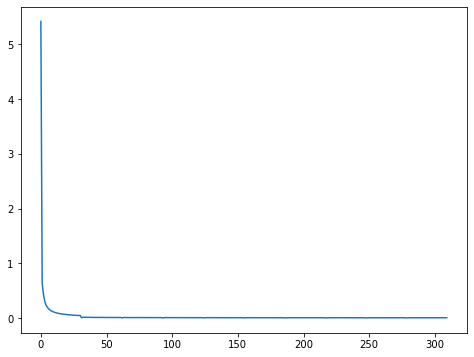

In [292]:
N_EPOCHS = 10

criterion = nn.MSELoss()
optimizer = optim.SGD(conv.parameters(), lr=1e-3, momentum=0.9)

history = []
for epoch in range(N_EPOCHS):
    running_loss = 0
    pbar = tqdm(train_loader)
    for i, (inputs, label) in enumerate(pbar):
        optimizer.zero_grad()
        outputs = conv(inputs.float())
        loss = criterion(outputs, label.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if not (i % 100):
            pbar.set_description(
                f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f}"
            )
            history.append(running_loss / (i+1))

plt.plot(history)
plt.show()

Loss 0.00758: 100%|██████████| 876/876 [00:01<00:00, 628.94it/s]


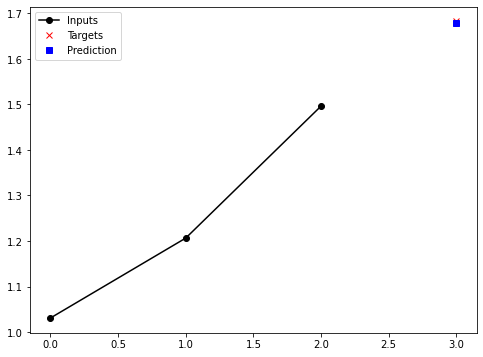

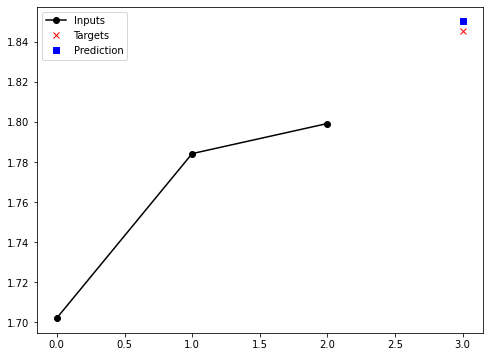

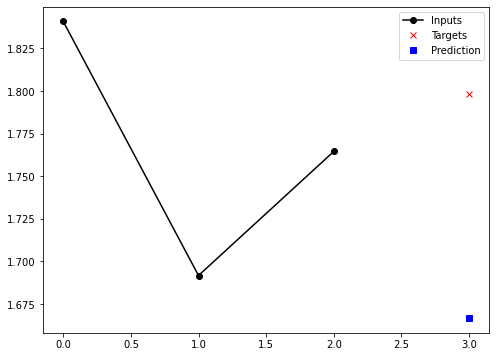

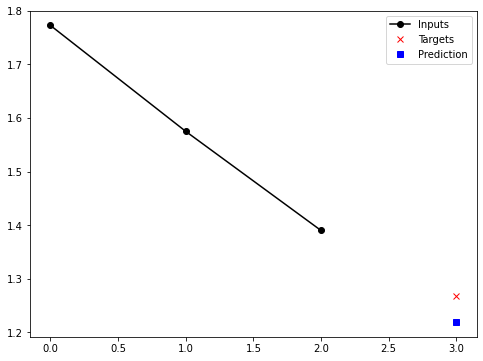

In [294]:
loss = nn.MSELoss()
running_loss = 0
pbar = tqdm(val_loader)
with torch.no_grad():
    for i, (inputs, label) in enumerate(pbar):
        out = conv(inputs.float())
        running_loss += loss(out, label.float())  # MSE per batch
        if not (i % 100):
            pbar.set_description(f"Loss {running_loss / (i+1):.5f}")

for i in range(25, 29):
    out = conv(torch.Tensor(val_ds[i][0])[None, :]).detach().numpy().squeeze()
    plt.plot(np.arange(0, CONV_WIDTH, 1), val_ds[i][0][:, 1], "ko-", label="Inputs")
    plt.plot(CONV_WIDTH, val_ds[i][1], "rx", label="Targets")
    plt.plot(CONV_WIDTH, out, "bs", label="Prediction")
    plt.legend()
    plt.show()